## EXP_2467_seq_prune_08_4_128_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
Instructions for updating:
Please use `layer.add_weight` method instead.
round0 [7 2 6 4]
7
Epoch 1/5
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1250/1250 - 3s - loss: 0.0548 - accuracy: 0.9797 - val_loss: 0.0324 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 2s - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0307 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 9.0881e-05 - accuracy: 1.0000 - val_loss: 0.0385 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 1.2364e-05 - accuracy: 1.0000 - val_loss: 0.0439 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 3.8095e-06 - accuracy: 1.0000 - val_loss: 0.0479 - val_accuracy: 0.9913


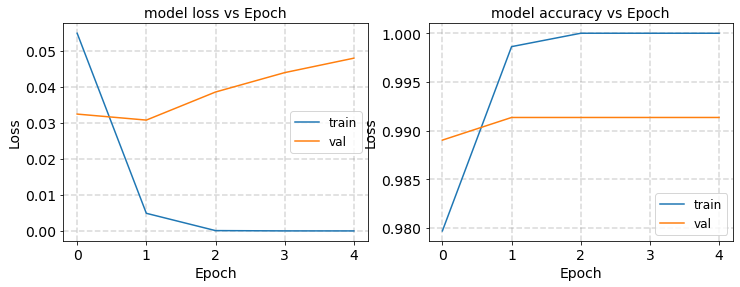

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1012 - accuracy: 0.9817 - val_loss: 0.0393 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 3s - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0424 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 2.1282e-04 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 5.9584e-05 - accuracy: 1.0000 - val_loss: 0.0538 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 2.2655e-05 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 0.9906


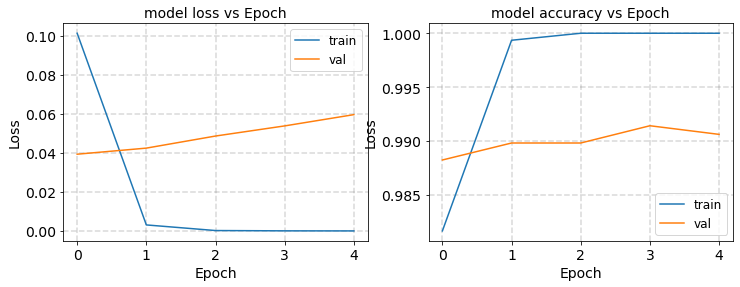

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0650 - accuracy: 0.9889 - val_loss: 0.0462 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 3s - loss: 4.5276e-04 - accuracy: 0.9999 - val_loss: 0.0500 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 3s - loss: 3.3809e-05 - accuracy: 1.0000 - val_loss: 0.0545 - val_accuracy: 0.9881
Epoch 4/5
1250/1250 - 3s - loss: 1.2457e-05 - accuracy: 1.0000 - val_loss: 0.0601 - val_accuracy: 0.9881
Epoch 5/5
1250/1250 - 3s - loss: 4.9770e-06 - accuracy: 1.0000 - val_loss: 0.0633 - val_accuracy: 0.9897


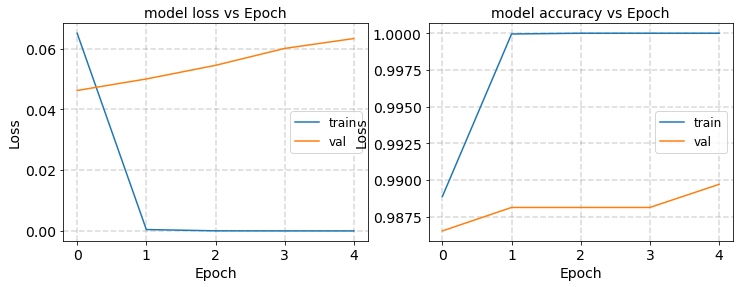

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0823 - accuracy: 0.9852 - val_loss: 0.0252 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0272 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0285 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 2.0238e-04 - accuracy: 1.0000 - val_loss: 0.0312 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 2.3985e-05 - accuracy: 1.0000 - val_loss: 0.0350 - val_accuracy: 0.9937


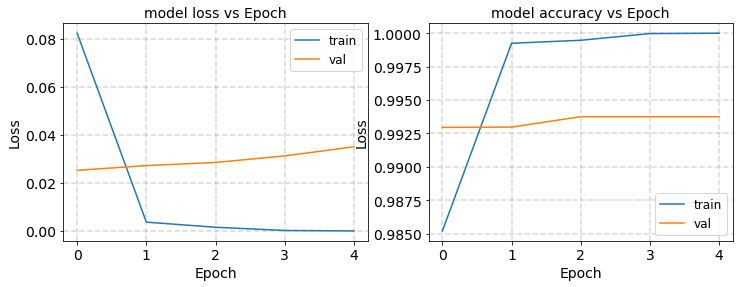

round1 [4 6 2 7]
4
Epoch 1/5
1250/1250 - 3s - loss: 9.3691e-06 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 3s - loss: 4.0803e-06 - accuracy: 1.0000 - val_loss: 0.0398 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 1.8027e-06 - accuracy: 1.0000 - val_loss: 0.0430 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 8.2657e-07 - accuracy: 1.0000 - val_loss: 0.0449 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 3.6762e-07 - accuracy: 1.0000 - val_loss: 0.0478 - val_accuracy: 0.9930


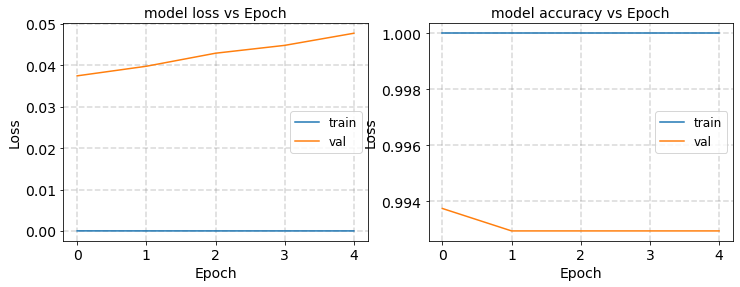

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0708 - accuracy: 0.9912 - val_loss: 0.0252 - val_accuracy: 0.9920
Epoch 2/5
1250/1250 - 3s - loss: 3.2772e-04 - accuracy: 0.9999 - val_loss: 0.0346 - val_accuracy: 0.9920
Epoch 3/5
1250/1250 - 3s - loss: 3.6251e-05 - accuracy: 1.0000 - val_loss: 0.0403 - val_accuracy: 0.9928
Epoch 4/5
1250/1250 - 3s - loss: 1.0683e-05 - accuracy: 1.0000 - val_loss: 0.0466 - val_accuracy: 0.9920
Epoch 5/5
1250/1250 - 3s - loss: 3.4910e-06 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 0.9920


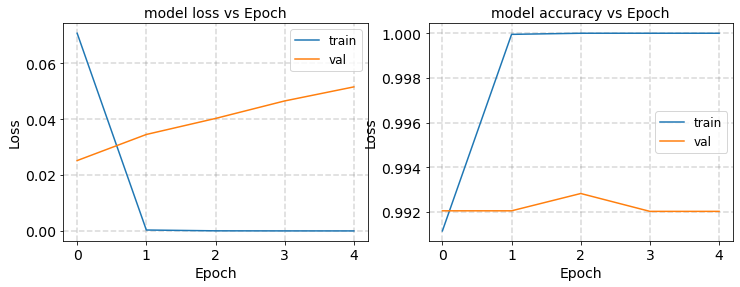

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0999 - accuracy: 0.9840 - val_loss: 0.0475 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 7.5498e-04 - accuracy: 0.9999 - val_loss: 0.0617 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 1.0013e-04 - accuracy: 1.0000 - val_loss: 0.0686 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 4s - loss: 2.8983e-05 - accuracy: 1.0000 - val_loss: 0.0760 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 4s - loss: 9.3858e-06 - accuracy: 1.0000 - val_loss: 0.0829 - val_accuracy: 0.9906


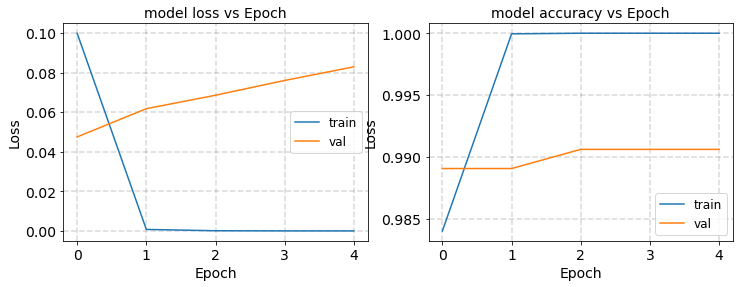

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0756 - accuracy: 0.9888 - val_loss: 0.0341 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 3s - loss: 7.7694e-04 - accuracy: 0.9999 - val_loss: 0.0392 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 9.2584e-05 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 2.8871e-05 - accuracy: 1.0000 - val_loss: 0.0479 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 1.1244e-05 - accuracy: 1.0000 - val_loss: 0.0507 - val_accuracy: 0.9937


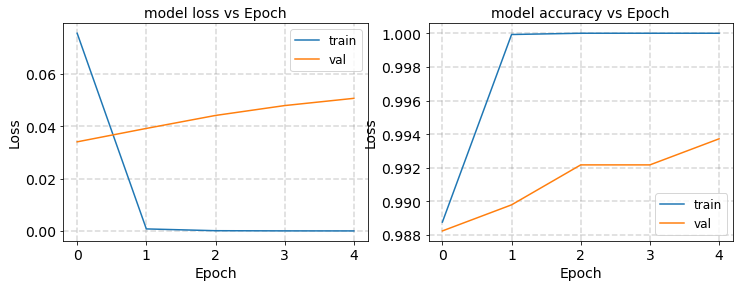

round2 [4 6 2 7]
4
Epoch 1/5
1250/1250 - 4s - loss: 0.0815 - accuracy: 0.9858 - val_loss: 0.0266 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0264 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 3s - loss: 1.7177e-04 - accuracy: 1.0000 - val_loss: 0.0285 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 3s - loss: 4.5280e-05 - accuracy: 1.0000 - val_loss: 0.0325 - val_accuracy: 0.9953
Epoch 5/5
1250/1250 - 3s - loss: 1.5338e-05 - accuracy: 1.0000 - val_loss: 0.0356 - val_accuracy: 0.9953


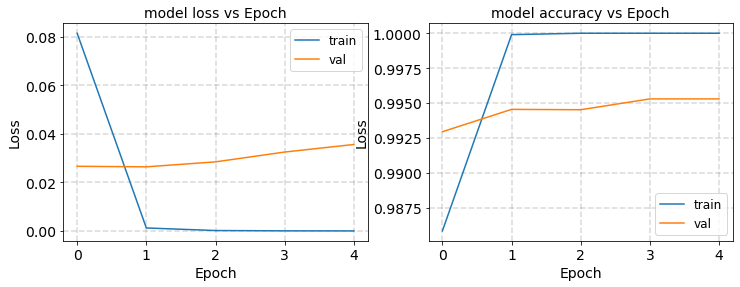

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0535 - accuracy: 0.9920 - val_loss: 0.0229 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 6.9018e-04 - accuracy: 0.9999 - val_loss: 0.0254 - val_accuracy: 0.9936
Epoch 3/5
1250/1250 - 3s - loss: 1.1574e-04 - accuracy: 1.0000 - val_loss: 0.0288 - val_accuracy: 0.9920
Epoch 4/5
1250/1250 - 3s - loss: 3.6965e-05 - accuracy: 1.0000 - val_loss: 0.0329 - val_accuracy: 0.9928
Epoch 5/5
1250/1250 - 3s - loss: 1.4462e-05 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 0.9928


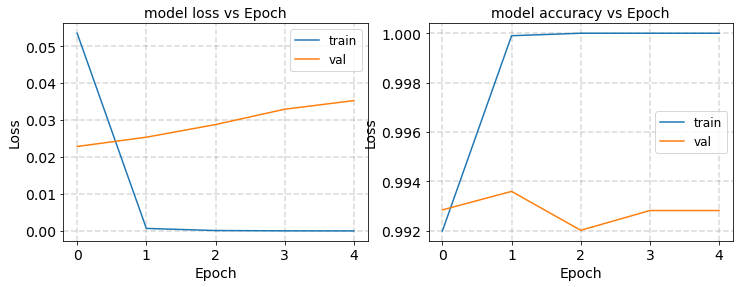

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0814 - accuracy: 0.9879 - val_loss: 0.0583 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 3s - loss: 8.0488e-04 - accuracy: 0.9999 - val_loss: 0.0652 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 3s - loss: 1.3653e-04 - accuracy: 1.0000 - val_loss: 0.0743 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 4.4381e-05 - accuracy: 1.0000 - val_loss: 0.0826 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 1.7116e-05 - accuracy: 1.0000 - val_loss: 0.0873 - val_accuracy: 0.9890


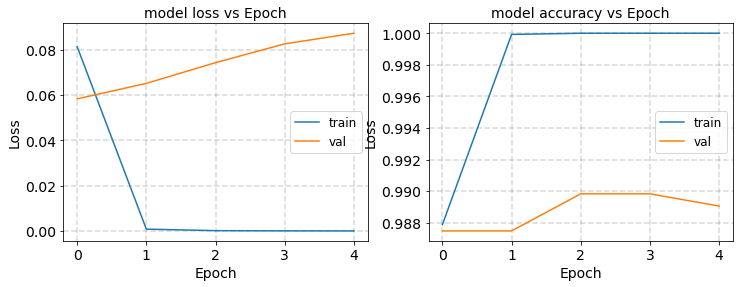

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0775 - accuracy: 0.9889 - val_loss: 0.0370 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 4.9235e-04 - accuracy: 1.0000 - val_loss: 0.0406 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 3s - loss: 1.2128e-04 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 4.0206e-05 - accuracy: 1.0000 - val_loss: 0.0476 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 1.6379e-05 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 0.9937


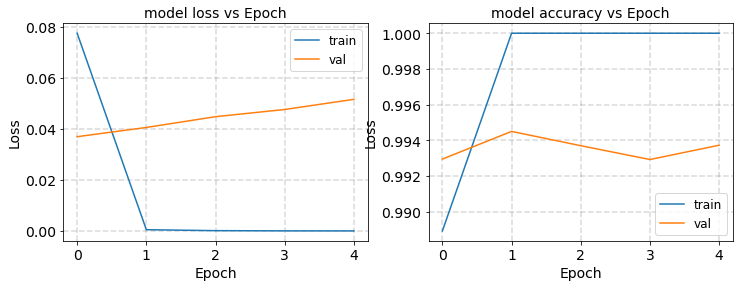

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten  (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense (P (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_1  (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_2  (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_3  (None, 128)               32898     
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
__________________________________________

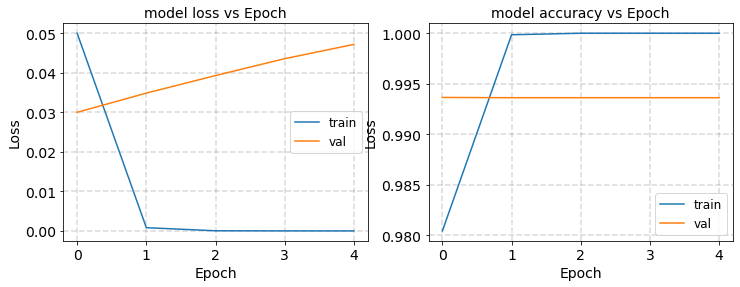

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0895 - accuracy: 0.9860 - val_loss: 0.0287 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0060 - accuracy: 0.9986 - val_loss: 0.0373 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0484 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 4s - loss: 9.3673e-05 - accuracy: 1.0000 - val_loss: 0.0474 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 4s - loss: 2.3644e-05 - accuracy: 1.0000 - val_loss: 0.0521 - val_accuracy: 0.9914


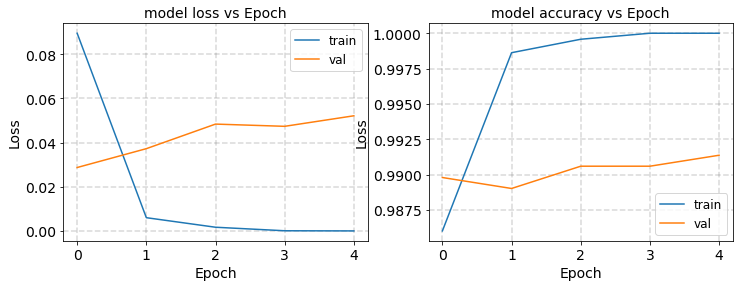

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0961 - accuracy: 0.9850 - val_loss: 0.0365 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 4s - loss: 0.0024 - accuracy: 0.9996 - val_loss: 0.0443 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 4s - loss: 2.0310e-04 - accuracy: 1.0000 - val_loss: 0.0561 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 4.1428e-05 - accuracy: 1.0000 - val_loss: 0.0631 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 1.3351e-05 - accuracy: 1.0000 - val_loss: 0.0700 - val_accuracy: 0.9897


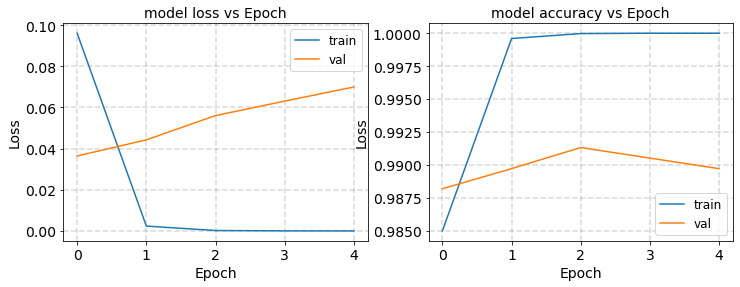

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0871 - accuracy: 0.9839 - val_loss: 0.0509 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 3s - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0401 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 3.0725e-04 - accuracy: 1.0000 - val_loss: 0.0510 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 4.8500e-05 - accuracy: 1.0000 - val_loss: 0.0623 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 1.5812e-05 - accuracy: 1.0000 - val_loss: 0.0647 - val_accuracy: 0.9922


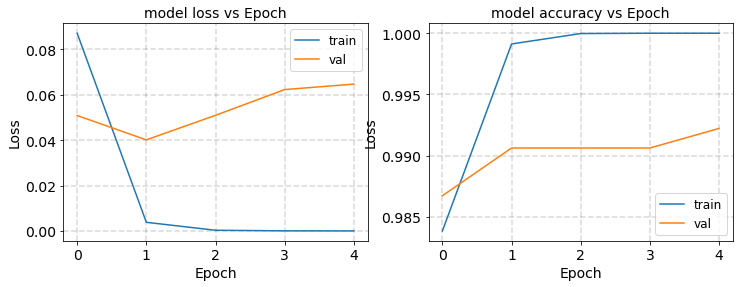

round1 [7 4 6 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.0704 - accuracy: 0.9858 - val_loss: 0.0391 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0477 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 3s - loss: 2.8755e-04 - accuracy: 0.9999 - val_loss: 0.0567 - val_accuracy: 0.9891
Epoch 4/5
1250/1250 - 2s - loss: 3.7228e-05 - accuracy: 1.0000 - val_loss: 0.0635 - val_accuracy: 0.9891
Epoch 5/5
1250/1250 - 2s - loss: 1.1549e-05 - accuracy: 1.0000 - val_loss: 0.0719 - val_accuracy: 0.9891


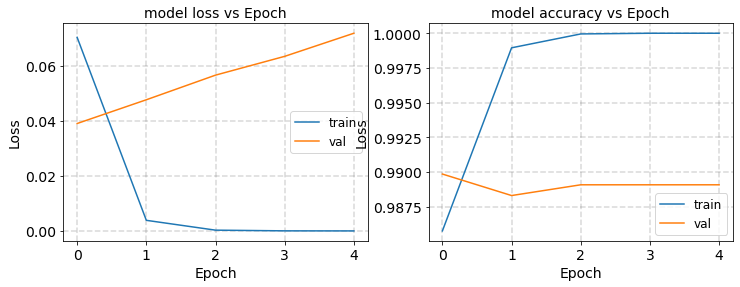

4
Epoch 1/5
1250/1250 - 2s - loss: 0.0805 - accuracy: 0.9891 - val_loss: 0.0510 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 4.2588e-04 - accuracy: 0.9999 - val_loss: 0.0588 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 2s - loss: 5.1604e-05 - accuracy: 1.0000 - val_loss: 0.0666 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 2s - loss: 1.5365e-05 - accuracy: 1.0000 - val_loss: 0.0720 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 5.8308e-06 - accuracy: 1.0000 - val_loss: 0.0773 - val_accuracy: 0.9914


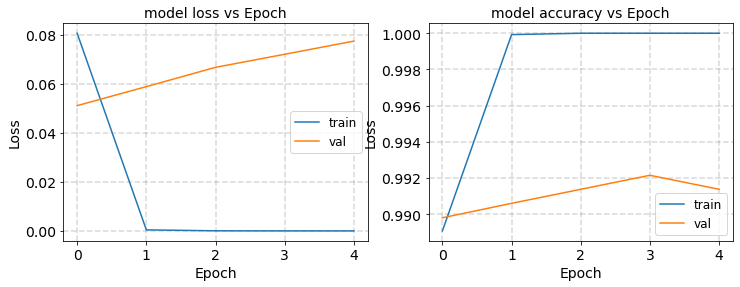

6
Epoch 1/5
1250/1250 - 2s - loss: 0.0855 - accuracy: 0.9875 - val_loss: 0.0403 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 3s - loss: 8.0684e-04 - accuracy: 0.9998 - val_loss: 0.0490 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 3s - loss: 1.0440e-04 - accuracy: 1.0000 - val_loss: 0.0576 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 2.7992e-05 - accuracy: 1.0000 - val_loss: 0.0652 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 9.7193e-06 - accuracy: 1.0000 - val_loss: 0.0709 - val_accuracy: 0.9913


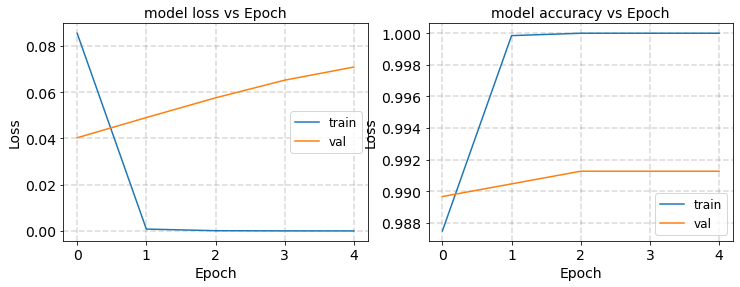

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0998 - accuracy: 0.9829 - val_loss: 0.0468 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0587 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 1.5699e-04 - accuracy: 1.0000 - val_loss: 0.0676 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 4.7694e-05 - accuracy: 1.0000 - val_loss: 0.0705 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 4s - loss: 1.6533e-05 - accuracy: 1.0000 - val_loss: 0.0748 - val_accuracy: 0.9906


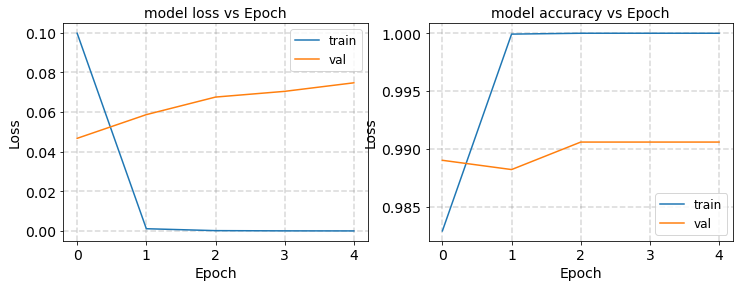

round2 [6 7 4 2]
6
Epoch 1/5
1250/1250 - 4s - loss: 0.0713 - accuracy: 0.9905 - val_loss: 0.0308 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 2.2409e-04 - accuracy: 1.0000 - val_loss: 0.0374 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 4s - loss: 3.6138e-05 - accuracy: 1.0000 - val_loss: 0.0436 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 4s - loss: 1.0254e-05 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 4s - loss: 3.5367e-06 - accuracy: 1.0000 - val_loss: 0.0545 - val_accuracy: 0.9937


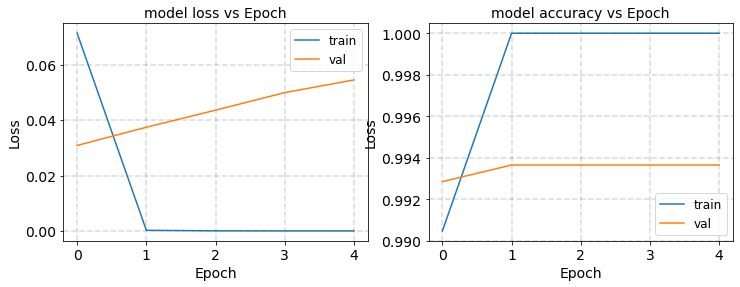

7
Epoch 1/5
1250/1250 - 4s - loss: 0.1274 - accuracy: 0.9847 - val_loss: 0.0244 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0264 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 2.2006e-04 - accuracy: 1.0000 - val_loss: 0.0309 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 4s - loss: 5.4204e-05 - accuracy: 1.0000 - val_loss: 0.0352 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 4s - loss: 1.7767e-05 - accuracy: 1.0000 - val_loss: 0.0392 - val_accuracy: 0.9945


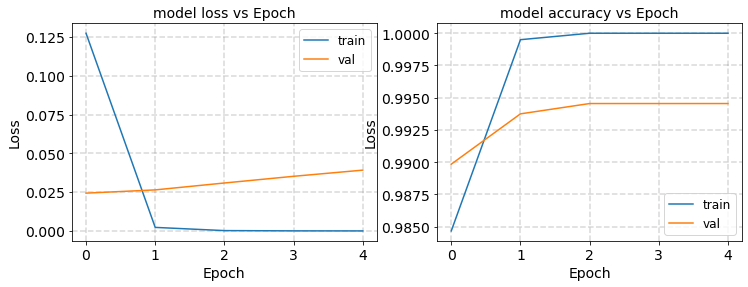

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0809 - accuracy: 0.9885 - val_loss: 0.0477 - val_accuracy: 0.9899
Epoch 2/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0628 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 4s - loss: 1.6398e-04 - accuracy: 1.0000 - val_loss: 0.0766 - val_accuracy: 0.9899
Epoch 4/5
1250/1250 - 3s - loss: 4.3845e-05 - accuracy: 1.0000 - val_loss: 0.0857 - val_accuracy: 0.9899
Epoch 5/5
1250/1250 - 3s - loss: 1.5793e-05 - accuracy: 1.0000 - val_loss: 0.0950 - val_accuracy: 0.9899


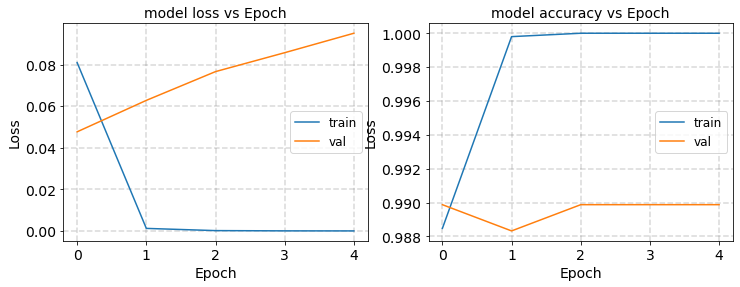

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0939 - accuracy: 0.9859 - val_loss: 0.0448 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 3s - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0529 - val_accuracy: 0.9859
Epoch 3/5
1250/1250 - 3s - loss: 2.6157e-04 - accuracy: 1.0000 - val_loss: 0.0584 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 4s - loss: 7.9362e-05 - accuracy: 1.0000 - val_loss: 0.0616 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 3.0804e-05 - accuracy: 1.0000 - val_loss: 0.0674 - val_accuracy: 0.9898


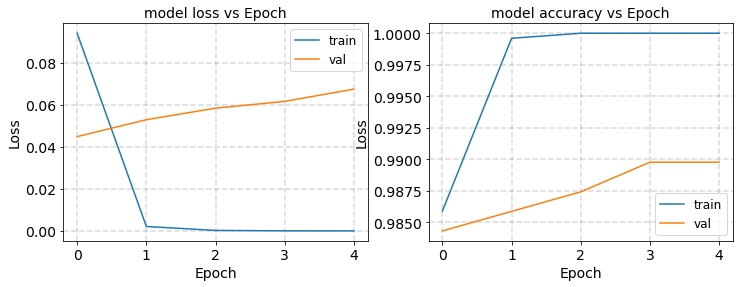

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_6  (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_7  (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_8  (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_9  (None, 128)               32898     
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
__________________________________________

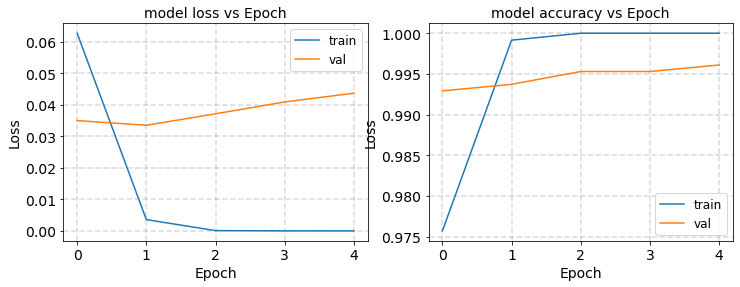

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0601 - accuracy: 0.9890 - val_loss: 0.0255 - val_accuracy: 0.9936
Epoch 2/5
1250/1250 - 3s - loss: 8.9037e-04 - accuracy: 0.9999 - val_loss: 0.0335 - val_accuracy: 0.9920
Epoch 3/5
1250/1250 - 3s - loss: 8.4466e-05 - accuracy: 1.0000 - val_loss: 0.0387 - val_accuracy: 0.9920
Epoch 4/5
1250/1250 - 3s - loss: 2.6406e-05 - accuracy: 1.0000 - val_loss: 0.0421 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 9.8981e-06 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 0.9929


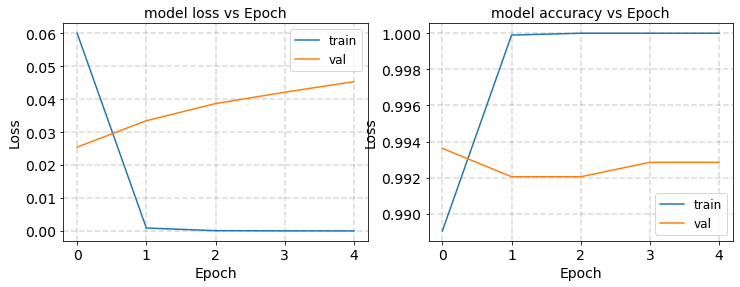

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0978 - accuracy: 0.9853 - val_loss: 0.0342 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 4s - loss: 0.0068 - accuracy: 0.9981 - val_loss: 0.0293 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 8.2883e-04 - accuracy: 0.9999 - val_loss: 0.0421 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 9.2635e-05 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 3.1649e-05 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 0.9930


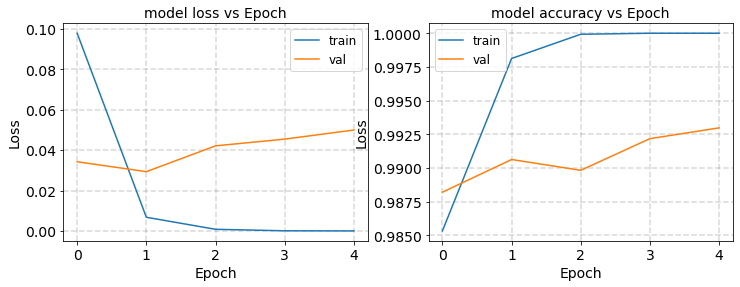

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0991 - accuracy: 0.9822 - val_loss: 0.0450 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 3s - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0546 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 3s - loss: 3.7579e-04 - accuracy: 1.0000 - val_loss: 0.0604 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 3s - loss: 4.8746e-05 - accuracy: 1.0000 - val_loss: 0.0638 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 3s - loss: 1.7489e-05 - accuracy: 1.0000 - val_loss: 0.0711 - val_accuracy: 0.9890


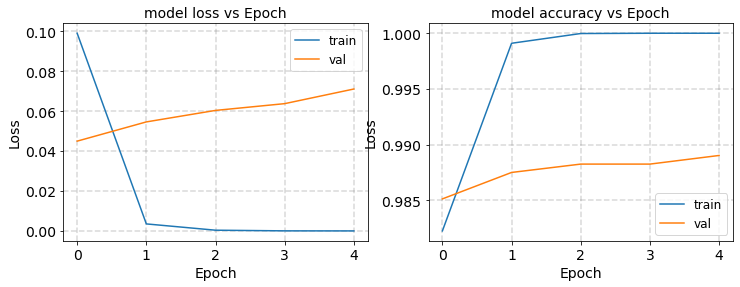

round1 [7 4 6 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.0789 - accuracy: 0.9863 - val_loss: 0.0289 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0377 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 1.9880e-04 - accuracy: 1.0000 - val_loss: 0.0456 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 3.6230e-05 - accuracy: 1.0000 - val_loss: 0.0496 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 1.4890e-05 - accuracy: 1.0000 - val_loss: 0.0532 - val_accuracy: 0.9929


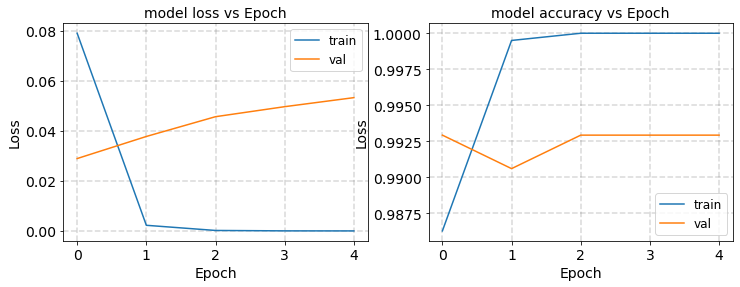

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0830 - accuracy: 0.9790 - val_loss: 0.0403 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 0.0028 - accuracy: 0.9995 - val_loss: 0.0541 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 3.2630e-04 - accuracy: 0.9999 - val_loss: 0.0628 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 4.5468e-05 - accuracy: 1.0000 - val_loss: 0.0702 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 1.5848e-05 - accuracy: 1.0000 - val_loss: 0.0765 - val_accuracy: 0.9898


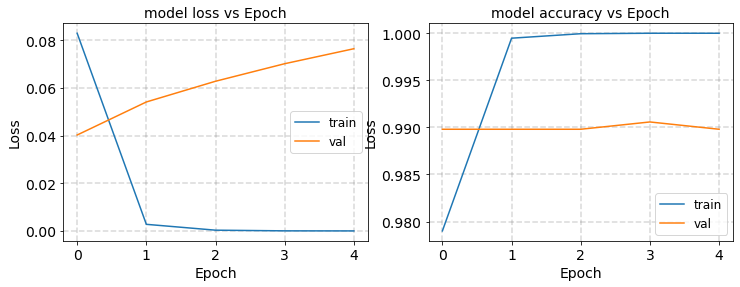

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0611 - accuracy: 0.9918 - val_loss: 0.0251 - val_accuracy: 0.9912
Epoch 2/5
1250/1250 - 3s - loss: 7.4064e-04 - accuracy: 0.9998 - val_loss: 0.0351 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 8.7785e-05 - accuracy: 1.0000 - val_loss: 0.0419 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 2.5350e-05 - accuracy: 1.0000 - val_loss: 0.0468 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 9.9591e-06 - accuracy: 1.0000 - val_loss: 0.0510 - val_accuracy: 0.9913


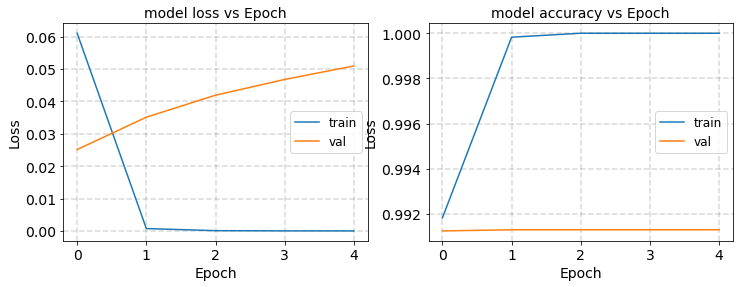

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0989 - accuracy: 0.9831 - val_loss: 0.0400 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0443 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 1.8855e-04 - accuracy: 1.0000 - val_loss: 0.0493 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 5.2805e-05 - accuracy: 1.0000 - val_loss: 0.0535 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 1.8968e-05 - accuracy: 1.0000 - val_loss: 0.0576 - val_accuracy: 0.9890


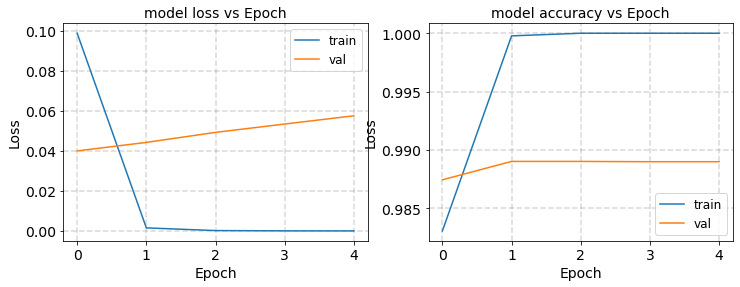

round2 [7 2 4 6]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.0692 - accuracy: 0.9868 - val_loss: 0.0453 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.0473 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 4s - loss: 2.8750e-04 - accuracy: 1.0000 - val_loss: 0.0581 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 4s - loss: 6.8972e-05 - accuracy: 1.0000 - val_loss: 0.0644 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 2.4066e-05 - accuracy: 1.0000 - val_loss: 0.0705 - val_accuracy: 0.9898


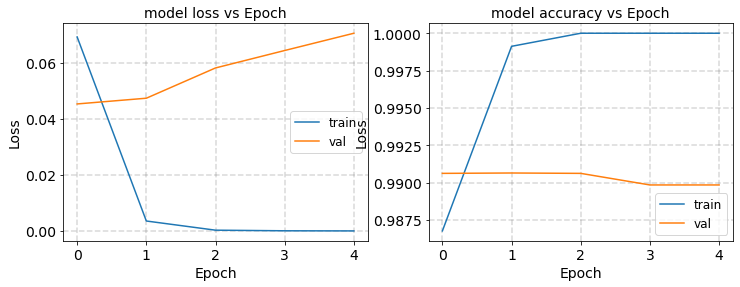

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0753 - accuracy: 0.9890 - val_loss: 0.0251 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 5.8952e-04 - accuracy: 0.9999 - val_loss: 0.0318 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 4s - loss: 1.0326e-04 - accuracy: 1.0000 - val_loss: 0.0355 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 3s - loss: 3.6905e-05 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 1.5442e-05 - accuracy: 1.0000 - val_loss: 0.0419 - val_accuracy: 0.9921


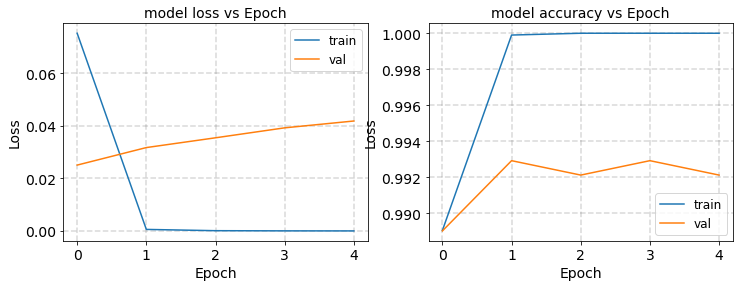

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0911 - accuracy: 0.9851 - val_loss: 0.0389 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 3s - loss: 8.7494e-04 - accuracy: 0.9999 - val_loss: 0.0501 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 3s - loss: 1.8881e-04 - accuracy: 1.0000 - val_loss: 0.0569 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 3s - loss: 5.3432e-05 - accuracy: 1.0000 - val_loss: 0.0684 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 1.1462e-05 - accuracy: 1.0000 - val_loss: 0.0808 - val_accuracy: 0.9874


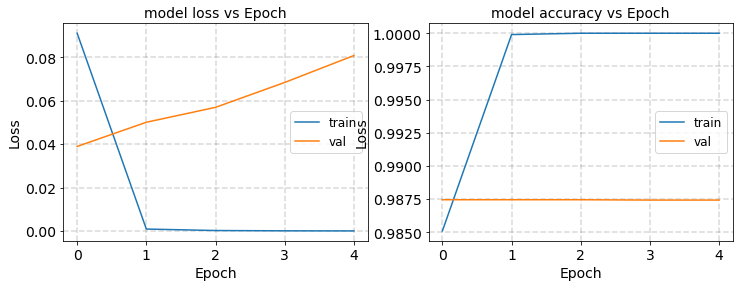

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0670 - accuracy: 0.9926 - val_loss: 0.0329 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 3s - loss: 2.4068e-04 - accuracy: 1.0000 - val_loss: 0.0360 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 5.9027e-05 - accuracy: 1.0000 - val_loss: 0.0394 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 3s - loss: 2.0586e-05 - accuracy: 1.0000 - val_loss: 0.0423 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 7.4674e-06 - accuracy: 1.0000 - val_loss: 0.0457 - val_accuracy: 0.9905


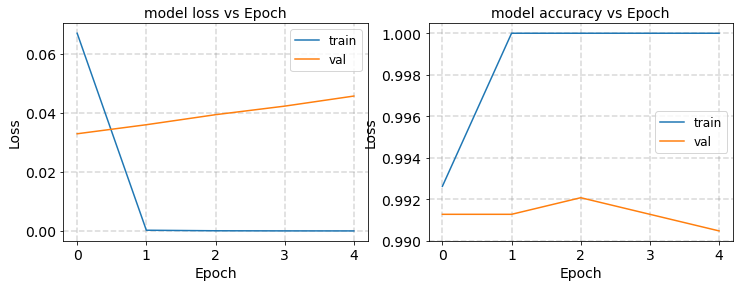

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_12 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_13 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_14 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_15 (None, 128)               32898     
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
__________________________________________

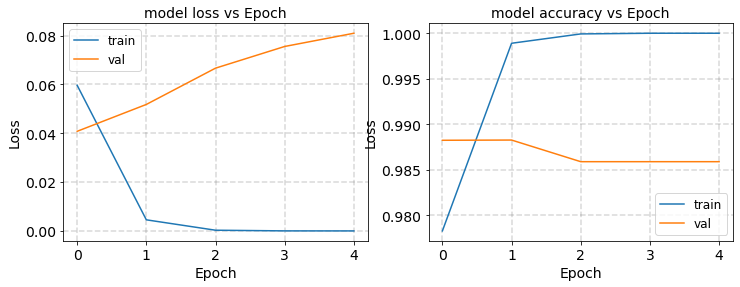

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0850 - accuracy: 0.9816 - val_loss: 0.0347 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 4s - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.0401 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0477 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0358 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 8.2859e-05 - accuracy: 1.0000 - val_loss: 0.0420 - val_accuracy: 0.9922


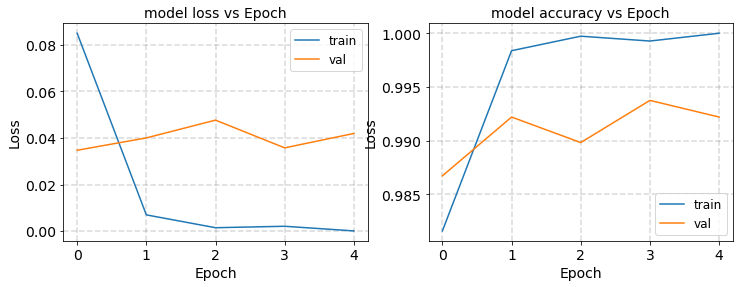

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0692 - accuracy: 0.9875 - val_loss: 0.0426 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.0350 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 3s - loss: 3.4156e-04 - accuracy: 0.9999 - val_loss: 0.0427 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 4.7434e-05 - accuracy: 1.0000 - val_loss: 0.0487 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 3s - loss: 1.5826e-05 - accuracy: 1.0000 - val_loss: 0.0530 - val_accuracy: 0.9930


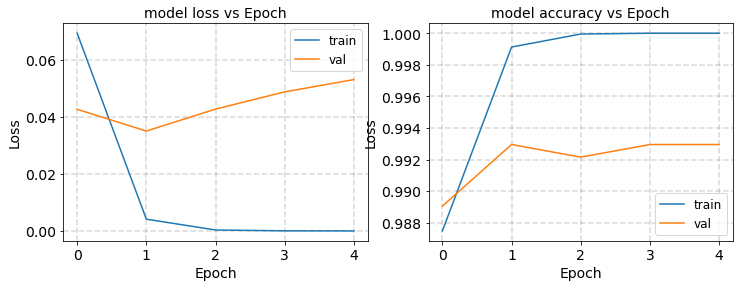

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0688 - accuracy: 0.9906 - val_loss: 0.0370 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 3s - loss: 8.4016e-04 - accuracy: 0.9998 - val_loss: 0.0401 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 1.1952e-04 - accuracy: 1.0000 - val_loss: 0.0451 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 3s - loss: 3.2971e-05 - accuracy: 1.0000 - val_loss: 0.0489 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 1.2601e-05 - accuracy: 1.0000 - val_loss: 0.0513 - val_accuracy: 0.9921


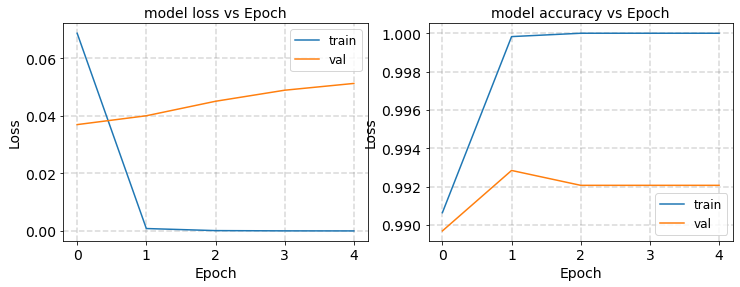

round1 [4 6 2 7]
4
Epoch 1/5
1250/1250 - 3s - loss: 0.0807 - accuracy: 0.9860 - val_loss: 0.0337 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0426 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 1.1228e-04 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 2.8416e-05 - accuracy: 1.0000 - val_loss: 0.0561 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 8.1027e-06 - accuracy: 1.0000 - val_loss: 0.0620 - val_accuracy: 0.9906


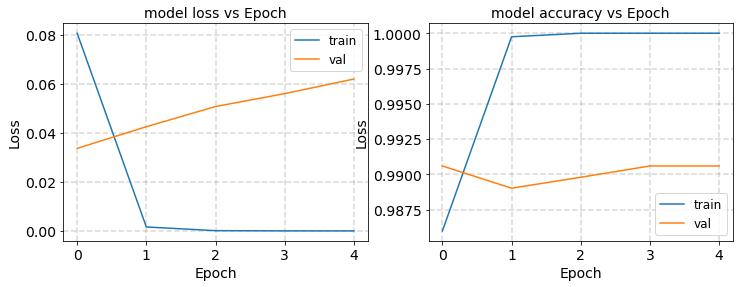

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0749 - accuracy: 0.9899 - val_loss: 0.0305 - val_accuracy: 0.9936
Epoch 2/5
1250/1250 - 3s - loss: 4.5226e-04 - accuracy: 0.9999 - val_loss: 0.0359 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 3s - loss: 8.6204e-05 - accuracy: 1.0000 - val_loss: 0.0403 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 3s - loss: 2.4134e-05 - accuracy: 1.0000 - val_loss: 0.0444 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 3s - loss: 9.0555e-06 - accuracy: 1.0000 - val_loss: 0.0484 - val_accuracy: 0.9944


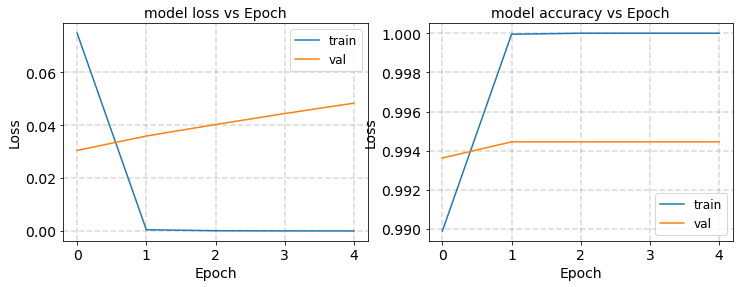

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1055 - accuracy: 0.9822 - val_loss: 0.0479 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9997 - val_loss: 0.0562 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 2.0735e-04 - accuracy: 1.0000 - val_loss: 0.0658 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 5.2742e-05 - accuracy: 1.0000 - val_loss: 0.0726 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 1.8349e-05 - accuracy: 1.0000 - val_loss: 0.0785 - val_accuracy: 0.9898


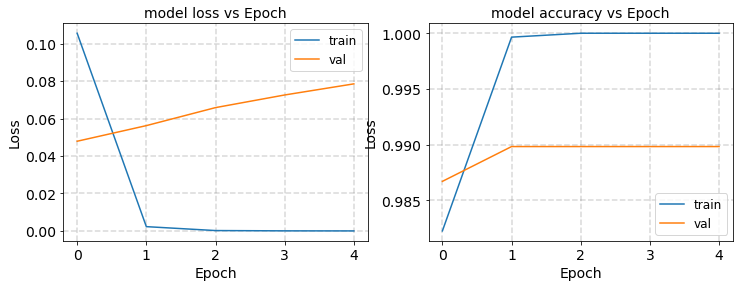

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0778 - accuracy: 0.9867 - val_loss: 0.0369 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0334 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.0415 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 5.3118e-04 - accuracy: 0.9996 - val_loss: 0.0458 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 2.0367e-04 - accuracy: 0.9998 - val_loss: 0.0469 - val_accuracy: 0.9930


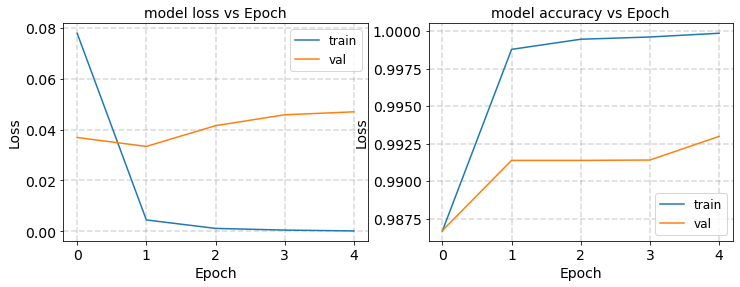

round2 [7 6 4 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 1.3305e-05 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 4.8303e-06 - accuracy: 1.0000 - val_loss: 0.0510 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 4s - loss: 2.0681e-06 - accuracy: 1.0000 - val_loss: 0.0533 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 3s - loss: 9.2620e-07 - accuracy: 1.0000 - val_loss: 0.0558 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 4s - loss: 4.3905e-07 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 0.9930


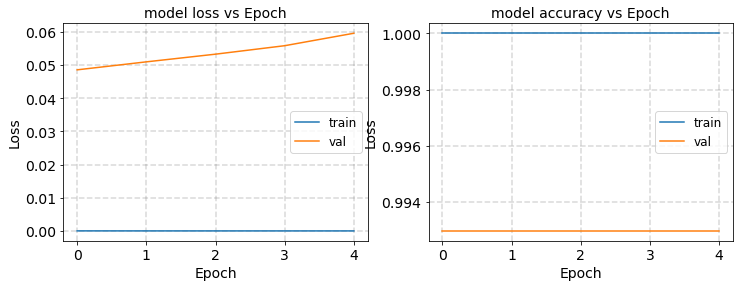

6
Epoch 1/5
1250/1250 - 3s - loss: 0.1167 - accuracy: 0.9874 - val_loss: 0.0238 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0217 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 4s - loss: 1.7697e-04 - accuracy: 1.0000 - val_loss: 0.0218 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 4s - loss: 4.5605e-05 - accuracy: 1.0000 - val_loss: 0.0237 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 3s - loss: 1.5867e-05 - accuracy: 1.0000 - val_loss: 0.0247 - val_accuracy: 0.9945


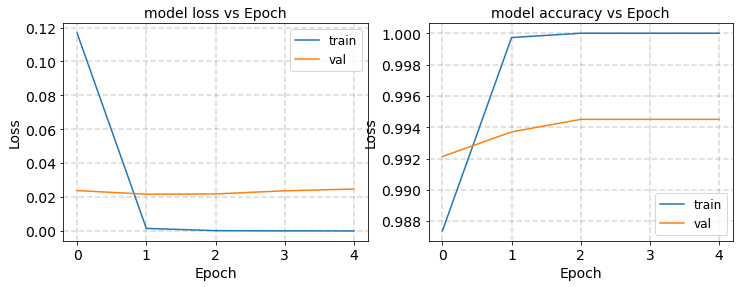

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0917 - accuracy: 0.9838 - val_loss: 0.0348 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0411 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 1.4510e-04 - accuracy: 1.0000 - val_loss: 0.0457 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 4s - loss: 4.7288e-05 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 4s - loss: 1.8265e-05 - accuracy: 1.0000 - val_loss: 0.0537 - val_accuracy: 0.9913


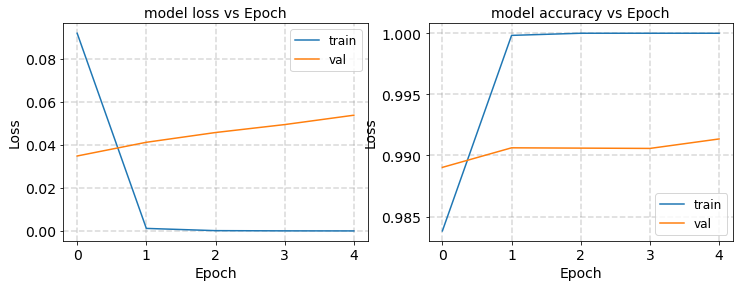

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0932 - accuracy: 0.9872 - val_loss: 0.0394 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 4s - loss: 5.7113e-04 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 9.5040e-05 - accuracy: 1.0000 - val_loss: 0.0575 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 2.6250e-05 - accuracy: 1.0000 - val_loss: 0.0652 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 4s - loss: 9.7764e-06 - accuracy: 1.0000 - val_loss: 0.0698 - val_accuracy: 0.9914


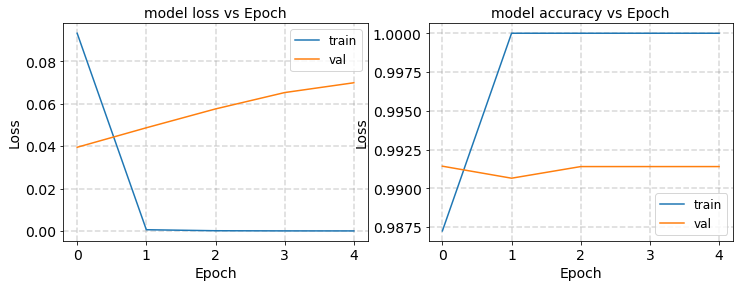

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_18 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_19 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_20 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_21 (None, 128)               32898     
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
__________________________________________

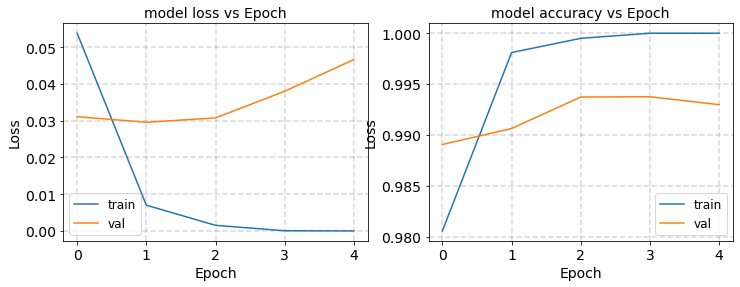

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1079 - accuracy: 0.9811 - val_loss: 0.0414 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 3s - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0442 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 3.3311e-04 - accuracy: 0.9999 - val_loss: 0.0500 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 4.3613e-05 - accuracy: 1.0000 - val_loss: 0.0549 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 2s - loss: 1.4434e-05 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 0.9914


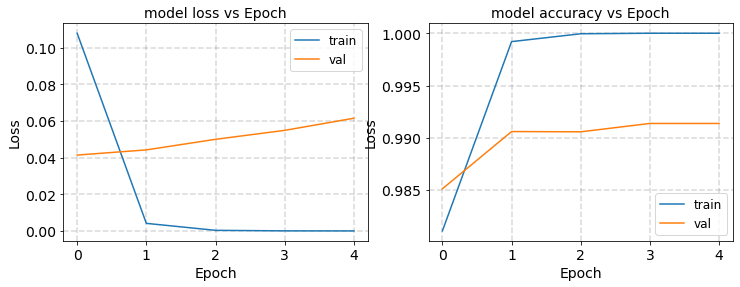

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0804 - accuracy: 0.9850 - val_loss: 0.0270 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 2s - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0285 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 3s - loss: 3.1500e-04 - accuracy: 0.9999 - val_loss: 0.0346 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 5.4853e-05 - accuracy: 1.0000 - val_loss: 0.0400 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 1.7539e-05 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9937


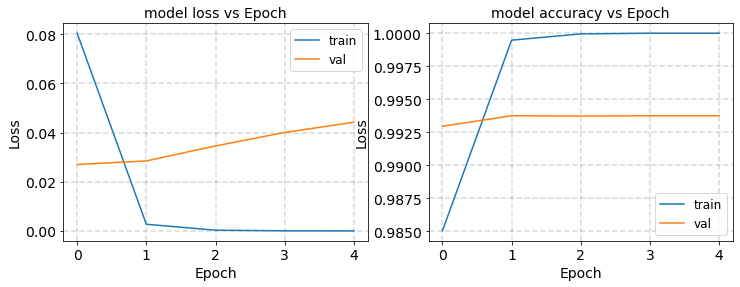

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0489 - accuracy: 0.9922 - val_loss: 0.0260 - val_accuracy: 0.9912
Epoch 2/5
1250/1250 - 3s - loss: 5.8872e-04 - accuracy: 0.9998 - val_loss: 0.0337 - val_accuracy: 0.9920
Epoch 3/5
1250/1250 - 3s - loss: 8.3533e-05 - accuracy: 1.0000 - val_loss: 0.0351 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 2.1426e-05 - accuracy: 1.0000 - val_loss: 0.0391 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 6.6215e-06 - accuracy: 1.0000 - val_loss: 0.0437 - val_accuracy: 0.9937


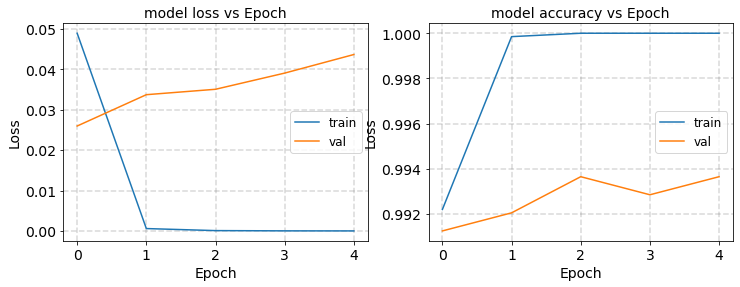

round1 [6 2 7 4]
6
Epoch 1/5
1250/1250 - 3s - loss: 2.1266e-06 - accuracy: 1.0000 - val_loss: 0.0465 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 6.7428e-07 - accuracy: 1.0000 - val_loss: 0.0498 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 2.4987e-07 - accuracy: 1.0000 - val_loss: 0.0524 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 1.0627e-07 - accuracy: 1.0000 - val_loss: 0.0547 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 4s - loss: 5.1804e-08 - accuracy: 1.0000 - val_loss: 0.0565 - val_accuracy: 0.9937


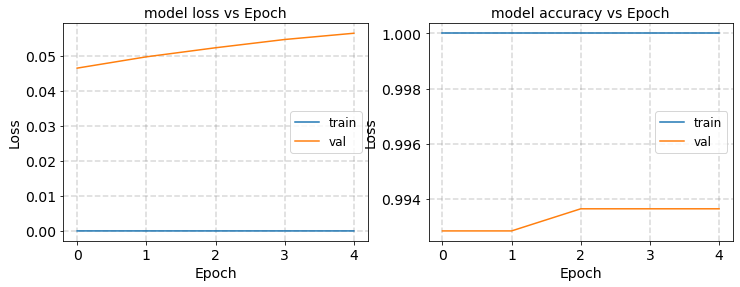

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1308 - accuracy: 0.9844 - val_loss: 0.0583 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 3s - loss: 6.0537e-04 - accuracy: 0.9999 - val_loss: 0.0769 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 4s - loss: 6.8009e-05 - accuracy: 1.0000 - val_loss: 0.0860 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 3s - loss: 2.2803e-05 - accuracy: 1.0000 - val_loss: 0.0946 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 9.2256e-06 - accuracy: 1.0000 - val_loss: 0.1035 - val_accuracy: 0.9858


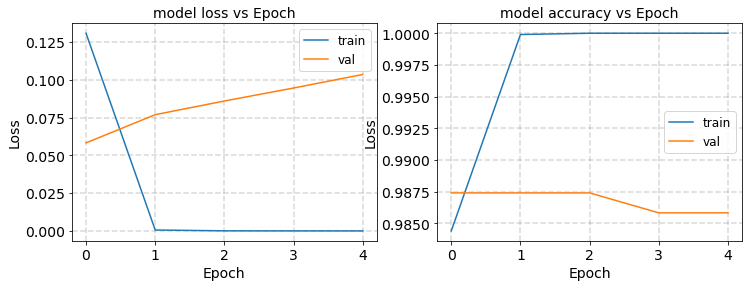

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0973 - accuracy: 0.9877 - val_loss: 0.0463 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0613 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 3.2738e-04 - accuracy: 1.0000 - val_loss: 0.0665 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 8.3140e-05 - accuracy: 1.0000 - val_loss: 0.0725 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 2.9299e-05 - accuracy: 1.0000 - val_loss: 0.0829 - val_accuracy: 0.9890


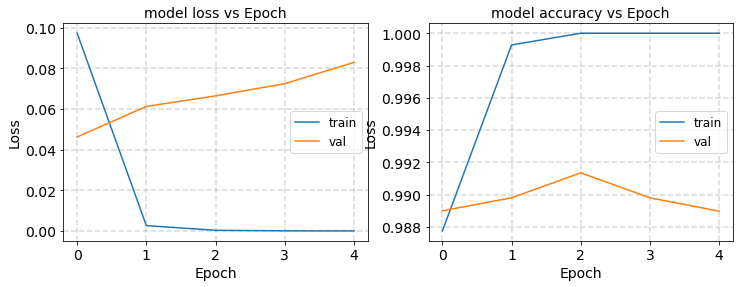

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0996 - accuracy: 0.9830 - val_loss: 0.0365 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 3s - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.0400 - val_accuracy: 0.9899
Epoch 3/5
1250/1250 - 4s - loss: 7.5749e-04 - accuracy: 0.9999 - val_loss: 0.0470 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 1.0027e-04 - accuracy: 1.0000 - val_loss: 0.0517 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 4s - loss: 3.3006e-05 - accuracy: 1.0000 - val_loss: 0.0561 - val_accuracy: 0.9914


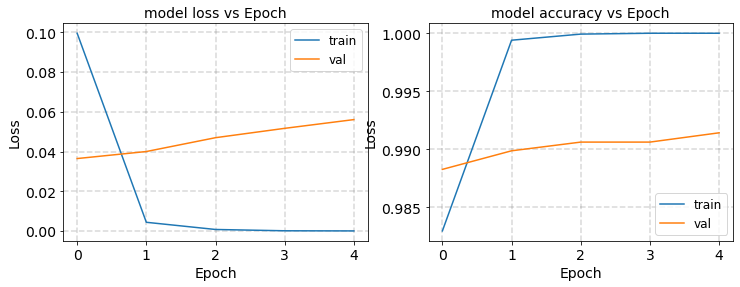

round2 [2 4 7 6]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.0844 - accuracy: 0.9841 - val_loss: 0.0626 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0677 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 9.9704e-05 - accuracy: 1.0000 - val_loss: 0.0796 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 2.5751e-05 - accuracy: 1.0000 - val_loss: 0.0883 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 8.3348e-06 - accuracy: 1.0000 - val_loss: 0.0961 - val_accuracy: 0.9906


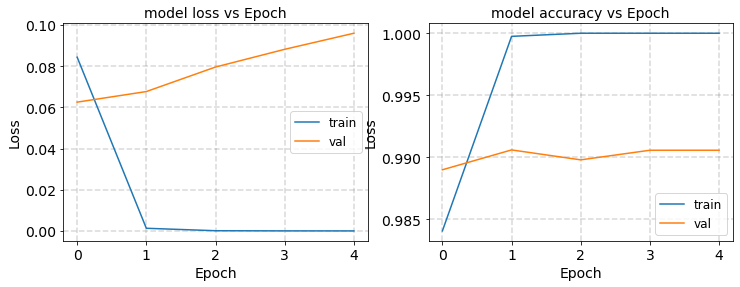

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0737 - accuracy: 0.9874 - val_loss: 0.0318 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0412 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 1.7378e-04 - accuracy: 1.0000 - val_loss: 0.0487 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 4.7580e-05 - accuracy: 1.0000 - val_loss: 0.0554 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 1.6719e-05 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 0.9898


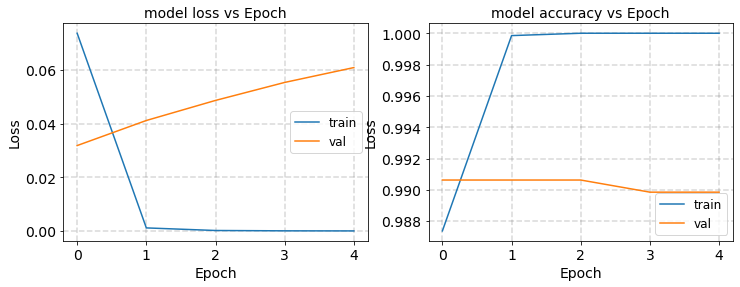

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0854 - accuracy: 0.9877 - val_loss: 0.0484 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0626 - val_accuracy: 0.9859
Epoch 3/5
1250/1250 - 3s - loss: 2.0906e-04 - accuracy: 1.0000 - val_loss: 0.0746 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 3s - loss: 6.0337e-05 - accuracy: 1.0000 - val_loss: 0.0809 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 2.1117e-05 - accuracy: 1.0000 - val_loss: 0.0869 - val_accuracy: 0.9882


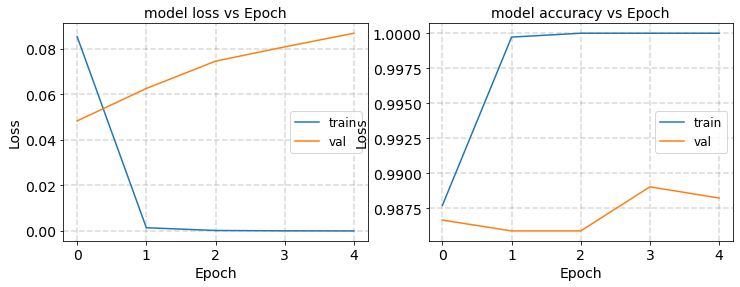

6
Epoch 1/5
1250/1250 - 3s - loss: 0.1331 - accuracy: 0.9895 - val_loss: 0.0282 - val_accuracy: 0.9936
Epoch 2/5
1250/1250 - 3s - loss: 3.7197e-04 - accuracy: 1.0000 - val_loss: 0.0288 - val_accuracy: 0.9936
Epoch 3/5
1250/1250 - 3s - loss: 9.6784e-05 - accuracy: 1.0000 - val_loss: 0.0322 - val_accuracy: 0.9936
Epoch 4/5
1250/1250 - 3s - loss: 3.2006e-05 - accuracy: 1.0000 - val_loss: 0.0356 - val_accuracy: 0.9936
Epoch 5/5
1250/1250 - 3s - loss: 1.2815e-05 - accuracy: 1.0000 - val_loss: 0.0366 - val_accuracy: 0.9936


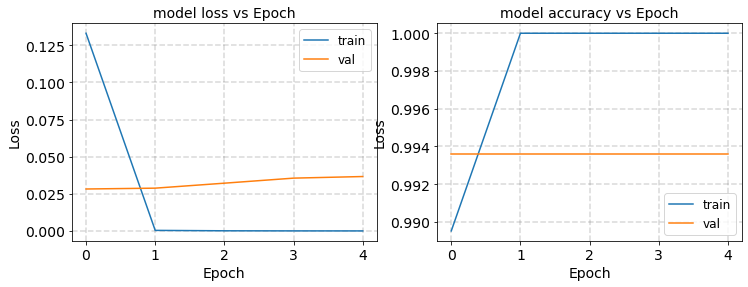

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_24 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_25 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_26 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_27 (None, 128)               32898     
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
__________________________________________

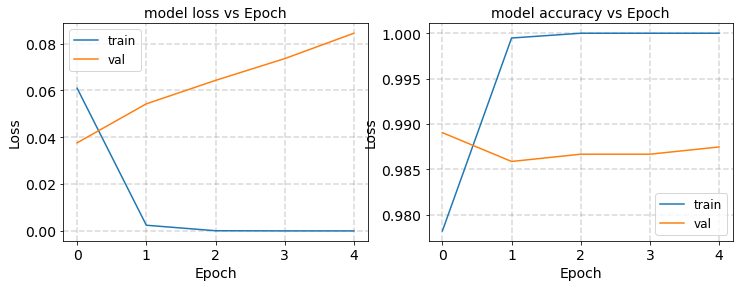

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0794 - accuracy: 0.9850 - val_loss: 0.0351 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 3s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0459 - val_accuracy: 0.9899
Epoch 3/5
1250/1250 - 3s - loss: 2.1728e-04 - accuracy: 1.0000 - val_loss: 0.0516 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 4.7997e-05 - accuracy: 1.0000 - val_loss: 0.0558 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 1.7877e-05 - accuracy: 1.0000 - val_loss: 0.0605 - val_accuracy: 0.9899


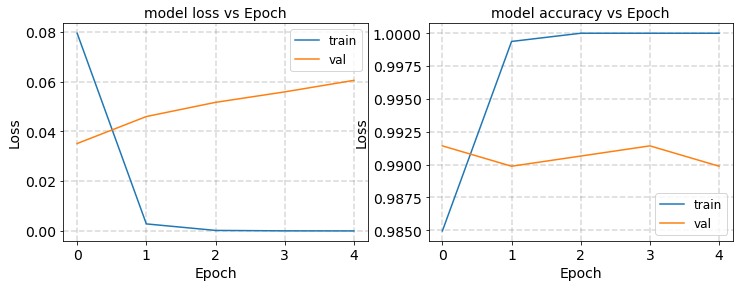

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0672 - accuracy: 0.9887 - val_loss: 0.0336 - val_accuracy: 0.9891
Epoch 2/5
1250/1250 - 3s - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0371 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 1.9241e-04 - accuracy: 1.0000 - val_loss: 0.0429 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 4.5354e-05 - accuracy: 1.0000 - val_loss: 0.0480 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 1.5202e-05 - accuracy: 1.0000 - val_loss: 0.0509 - val_accuracy: 0.9914


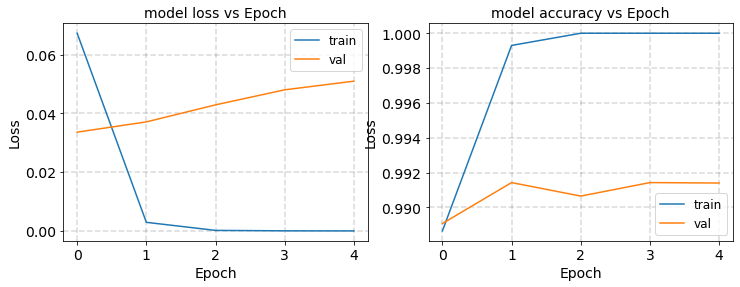

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0743 - accuracy: 0.9887 - val_loss: 0.0398 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 3s - loss: 7.1216e-04 - accuracy: 0.9998 - val_loss: 0.0452 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 8.3105e-05 - accuracy: 1.0000 - val_loss: 0.0511 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 2.7097e-05 - accuracy: 1.0000 - val_loss: 0.0558 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 1.0806e-05 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9921


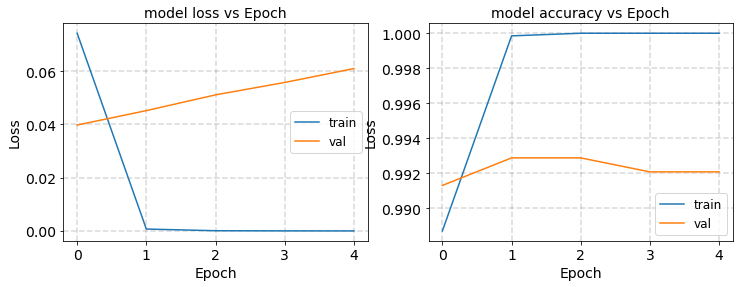

round1 [4 7 2 6]
4
Epoch 1/5
1250/1250 - 4s - loss: 0.0743 - accuracy: 0.9864 - val_loss: 0.0373 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0459 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 4s - loss: 3.4884e-04 - accuracy: 0.9999 - val_loss: 0.0588 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 2.0513e-05 - accuracy: 1.0000 - val_loss: 0.0647 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 6.6140e-06 - accuracy: 1.0000 - val_loss: 0.0704 - val_accuracy: 0.9906


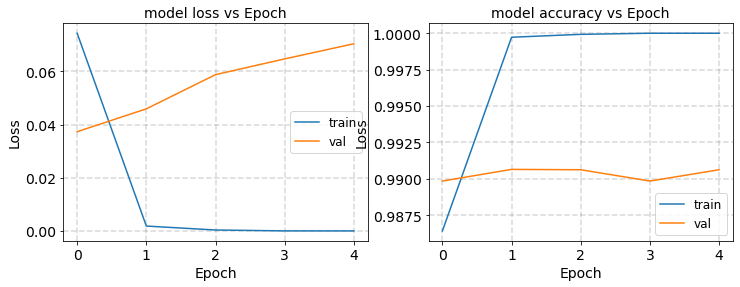

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0731 - accuracy: 0.9884 - val_loss: 0.0558 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 6.7772e-04 - accuracy: 0.9998 - val_loss: 0.0674 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 3s - loss: 4.7712e-05 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 3s - loss: 1.6760e-05 - accuracy: 1.0000 - val_loss: 0.0853 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 3s - loss: 6.8516e-06 - accuracy: 1.0000 - val_loss: 0.0901 - val_accuracy: 0.9875


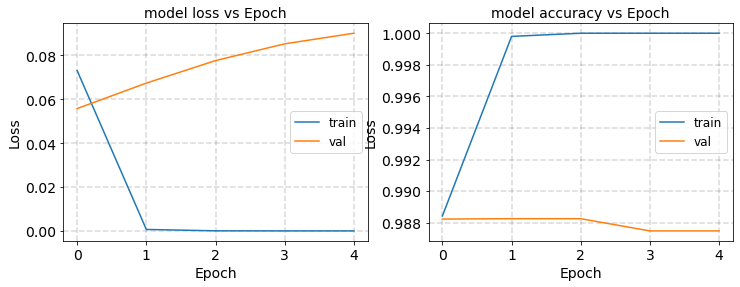

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1222 - accuracy: 0.9830 - val_loss: 0.0526 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9997 - val_loss: 0.0671 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 3s - loss: 2.1873e-04 - accuracy: 1.0000 - val_loss: 0.0779 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 3s - loss: 6.1437e-05 - accuracy: 1.0000 - val_loss: 0.0842 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 2.2564e-05 - accuracy: 1.0000 - val_loss: 0.0923 - val_accuracy: 0.9866


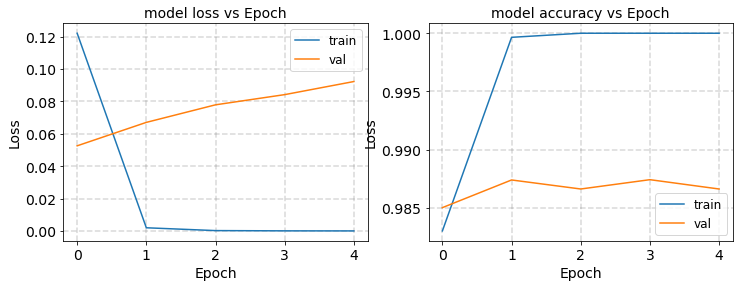

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0696 - accuracy: 0.9883 - val_loss: 0.0287 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 3s - loss: 4.7077e-04 - accuracy: 0.9999 - val_loss: 0.0355 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 8.7798e-05 - accuracy: 1.0000 - val_loss: 0.0395 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 3s - loss: 2.7795e-05 - accuracy: 1.0000 - val_loss: 0.0446 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 3s - loss: 1.0478e-05 - accuracy: 1.0000 - val_loss: 0.0485 - val_accuracy: 0.9929


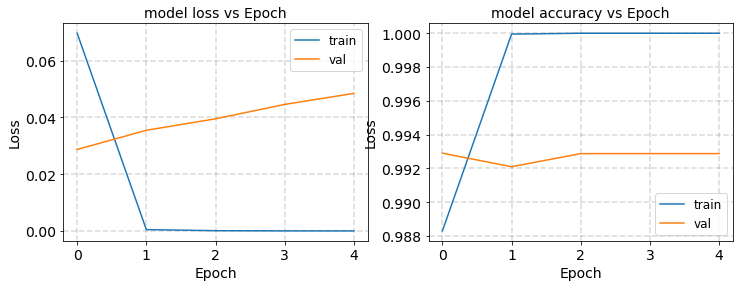

round2 [7 4 6 2]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.0882 - accuracy: 0.9884 - val_loss: 0.0366 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0484 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 1.8551e-04 - accuracy: 1.0000 - val_loss: 0.0579 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 4s - loss: 5.1851e-05 - accuracy: 1.0000 - val_loss: 0.0642 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 4s - loss: 1.9446e-05 - accuracy: 1.0000 - val_loss: 0.0711 - val_accuracy: 0.9906


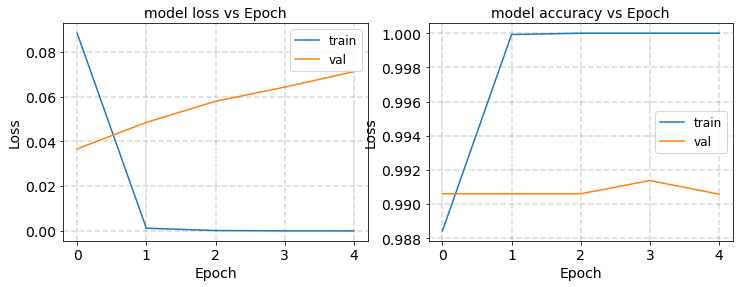

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0981 - accuracy: 0.9791 - val_loss: 0.0351 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 4s - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0423 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 4s - loss: 8.3534e-04 - accuracy: 0.9999 - val_loss: 0.0531 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 4s - loss: 1.0141e-04 - accuracy: 1.0000 - val_loss: 0.0599 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 2.9834e-05 - accuracy: 1.0000 - val_loss: 0.0657 - val_accuracy: 0.9914


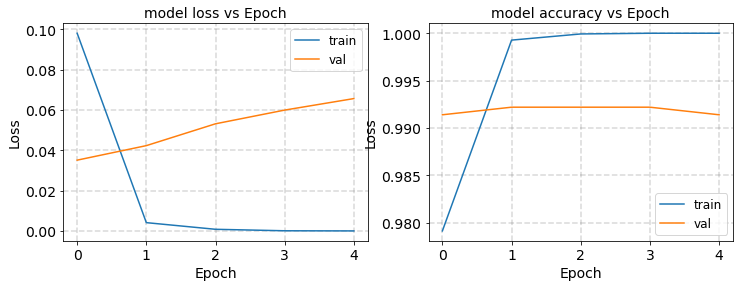

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0701 - accuracy: 0.9898 - val_loss: 0.0345 - val_accuracy: 0.9937
Epoch 2/5
1250/1250 - 4s - loss: 5.2265e-04 - accuracy: 0.9999 - val_loss: 0.0427 - val_accuracy: 0.9944
Epoch 3/5
1250/1250 - 4s - loss: 7.7145e-05 - accuracy: 1.0000 - val_loss: 0.0508 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 4s - loss: 1.7289e-05 - accuracy: 1.0000 - val_loss: 0.0551 - val_accuracy: 0.9944
Epoch 5/5
1250/1250 - 4s - loss: 6.7119e-06 - accuracy: 1.0000 - val_loss: 0.0594 - val_accuracy: 0.9944


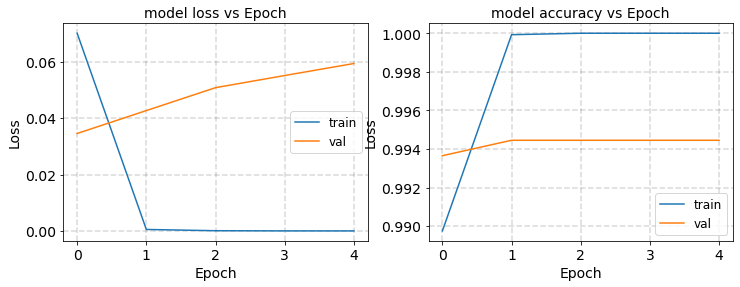

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0979 - accuracy: 0.9872 - val_loss: 0.0631 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 4s - loss: 7.7229e-04 - accuracy: 0.9999 - val_loss: 0.0776 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 4s - loss: 9.9345e-05 - accuracy: 1.0000 - val_loss: 0.0898 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 4s - loss: 3.1996e-05 - accuracy: 1.0000 - val_loss: 0.0982 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 4s - loss: 1.2940e-05 - accuracy: 1.0000 - val_loss: 0.1077 - val_accuracy: 0.9875


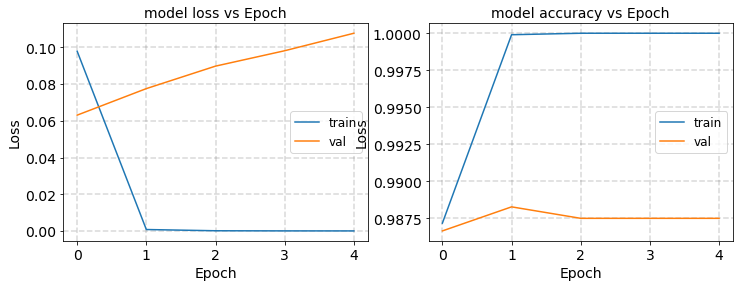

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_30 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_31 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_32 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_33 (None, 128)               32898     
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
_________________________________________

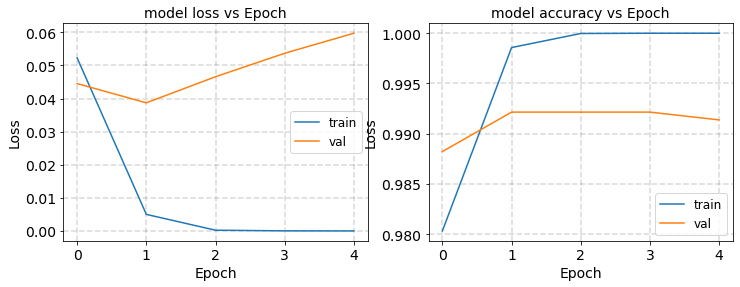

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0790 - accuracy: 0.9887 - val_loss: 0.0324 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0469 - val_accuracy: 0.9920
Epoch 3/5
1250/1250 - 3s - loss: 1.2514e-04 - accuracy: 1.0000 - val_loss: 0.0523 - val_accuracy: 0.9920
Epoch 4/5
1250/1250 - 3s - loss: 3.6466e-05 - accuracy: 1.0000 - val_loss: 0.0582 - val_accuracy: 0.9920
Epoch 5/5
1250/1250 - 3s - loss: 1.3258e-05 - accuracy: 1.0000 - val_loss: 0.0638 - val_accuracy: 0.9920


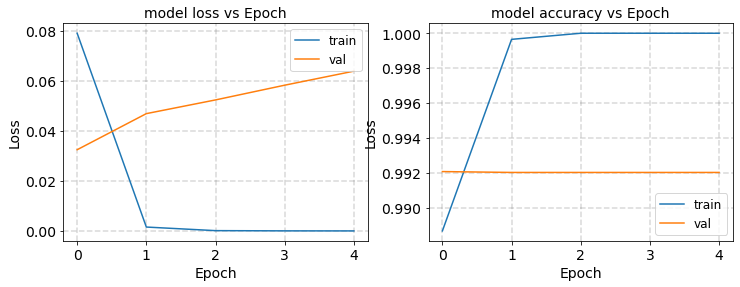

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0806 - accuracy: 0.9849 - val_loss: 0.0387 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0455 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 1.0680e-04 - accuracy: 1.0000 - val_loss: 0.0515 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 3.2756e-05 - accuracy: 1.0000 - val_loss: 0.0580 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 1.2046e-05 - accuracy: 1.0000 - val_loss: 0.0639 - val_accuracy: 0.9890


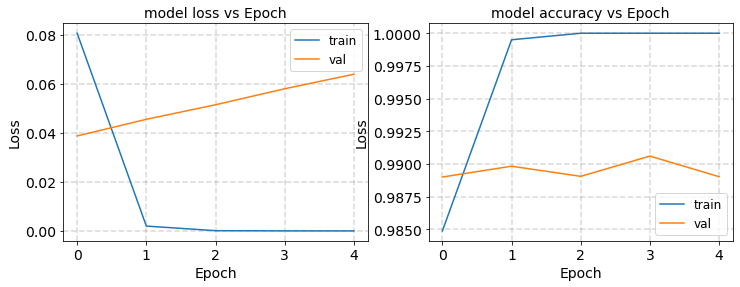

4
Epoch 1/5
1250/1250 - 3s - loss: 0.0795 - accuracy: 0.9845 - val_loss: 0.0278 - val_accuracy: 0.9938
Epoch 2/5
1250/1250 - 3s - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.0375 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 2.2874e-04 - accuracy: 1.0000 - val_loss: 0.0501 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 3.0694e-05 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 2s - loss: 1.0477e-05 - accuracy: 1.0000 - val_loss: 0.0621 - val_accuracy: 0.9930


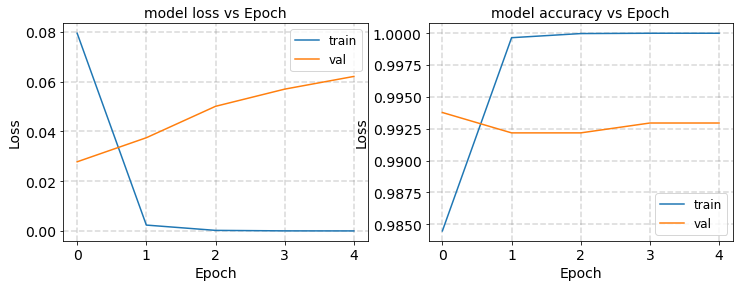

round1 [4 7 6 2]
4
Epoch 1/5
1250/1250 - 3s - loss: 4.1794e-06 - accuracy: 1.0000 - val_loss: 0.0672 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 3s - loss: 1.7421e-06 - accuracy: 1.0000 - val_loss: 0.0712 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 7.6364e-07 - accuracy: 1.0000 - val_loss: 0.0757 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 3s - loss: 3.4314e-07 - accuracy: 1.0000 - val_loss: 0.0801 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 3s - loss: 1.6201e-07 - accuracy: 1.0000 - val_loss: 0.0848 - val_accuracy: 0.9922


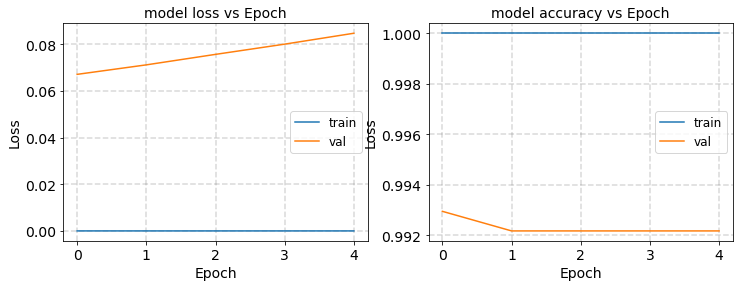

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0887 - accuracy: 0.9896 - val_loss: 0.0427 - val_accuracy: 0.9875
Epoch 2/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0474 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 1.5425e-04 - accuracy: 1.0000 - val_loss: 0.0565 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 3.9219e-05 - accuracy: 1.0000 - val_loss: 0.0628 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 3s - loss: 1.2422e-05 - accuracy: 1.0000 - val_loss: 0.0687 - val_accuracy: 0.9906


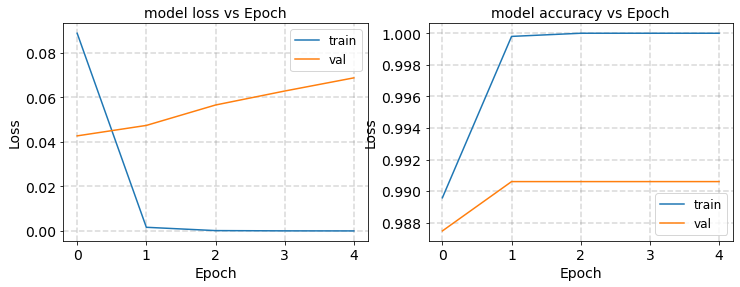

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0715 - accuracy: 0.9906 - val_loss: 0.0290 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 3s - loss: 3.0551e-04 - accuracy: 1.0000 - val_loss: 0.0363 - val_accuracy: 0.9921
Epoch 3/5
1250/1250 - 3s - loss: 7.1268e-05 - accuracy: 1.0000 - val_loss: 0.0411 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 3s - loss: 2.4344e-05 - accuracy: 1.0000 - val_loss: 0.0464 - val_accuracy: 0.9921
Epoch 5/5
1250/1250 - 3s - loss: 9.1510e-06 - accuracy: 1.0000 - val_loss: 0.0521 - val_accuracy: 0.9921


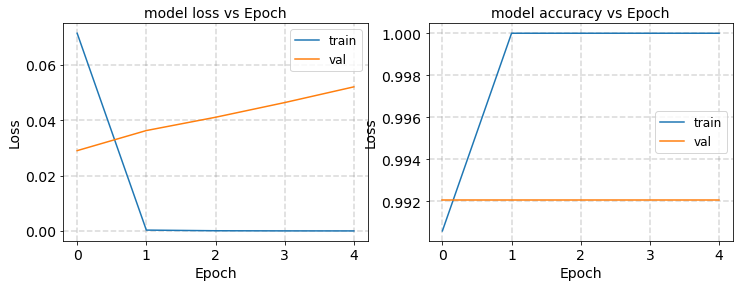

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0913 - accuracy: 0.9821 - val_loss: 0.0459 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0624 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 3s - loss: 1.4919e-04 - accuracy: 1.0000 - val_loss: 0.0699 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 4.7377e-05 - accuracy: 1.0000 - val_loss: 0.0763 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 1.7687e-05 - accuracy: 1.0000 - val_loss: 0.0830 - val_accuracy: 0.9882


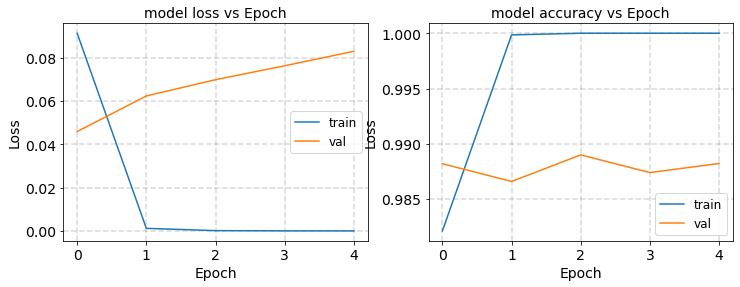

round2 [7 6 2 4]
7
Epoch 1/5
1250/1250 - 3s - loss: 0.0728 - accuracy: 0.9854 - val_loss: 0.0367 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0500 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 3s - loss: 3.1503e-04 - accuracy: 1.0000 - val_loss: 0.0548 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 6.9546e-05 - accuracy: 1.0000 - val_loss: 0.0607 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 3s - loss: 2.4134e-05 - accuracy: 1.0000 - val_loss: 0.0654 - val_accuracy: 0.9906


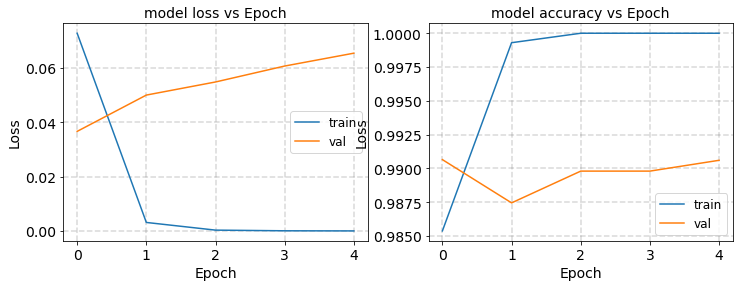

6
Epoch 1/5
1250/1250 - 3s - loss: 0.0845 - accuracy: 0.9888 - val_loss: 0.0417 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 8.4949e-04 - accuracy: 0.9998 - val_loss: 0.0491 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 3s - loss: 8.3908e-05 - accuracy: 1.0000 - val_loss: 0.0586 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 3s - loss: 2.2295e-05 - accuracy: 1.0000 - val_loss: 0.0672 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 7.6635e-06 - accuracy: 1.0000 - val_loss: 0.0734 - val_accuracy: 0.9913


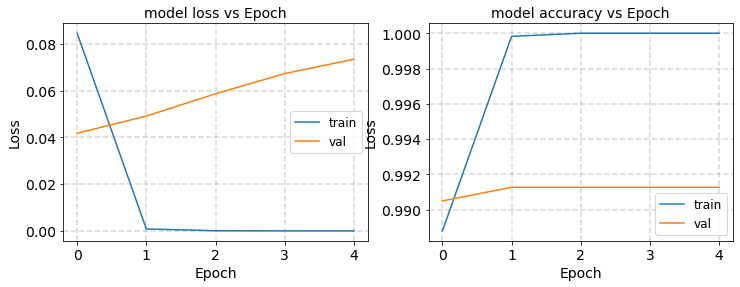

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0755 - accuracy: 0.9873 - val_loss: 0.0405 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 7.0455e-04 - accuracy: 0.9999 - val_loss: 0.0516 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 3s - loss: 1.1238e-04 - accuracy: 1.0000 - val_loss: 0.0610 - val_accuracy: 0.9914
Epoch 4/5
1250/1250 - 3s - loss: 3.0461e-05 - accuracy: 1.0000 - val_loss: 0.0748 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 3s - loss: 6.3179e-06 - accuracy: 1.0000 - val_loss: 0.0865 - val_accuracy: 0.9906


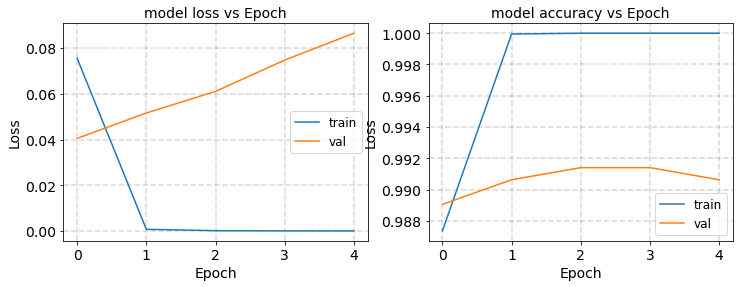

4
Epoch 1/5
1250/1250 - 3s - loss: 0.1035 - accuracy: 0.9855 - val_loss: 0.0389 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 3s - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0473 - val_accuracy: 0.9851
Epoch 3/5
1250/1250 - 3s - loss: 4.2838e-04 - accuracy: 1.0000 - val_loss: 0.0555 - val_accuracy: 0.9883
Epoch 4/5
1250/1250 - 3s - loss: 1.0973e-04 - accuracy: 1.0000 - val_loss: 0.0612 - val_accuracy: 0.9883
Epoch 5/5
1250/1250 - 3s - loss: 3.9289e-05 - accuracy: 1.0000 - val_loss: 0.0683 - val_accuracy: 0.9883


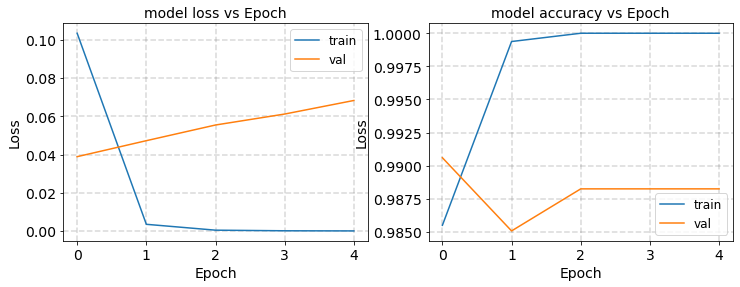

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_36 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_37 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_38 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_39 (None, 128)               32898     
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
_________________________________________

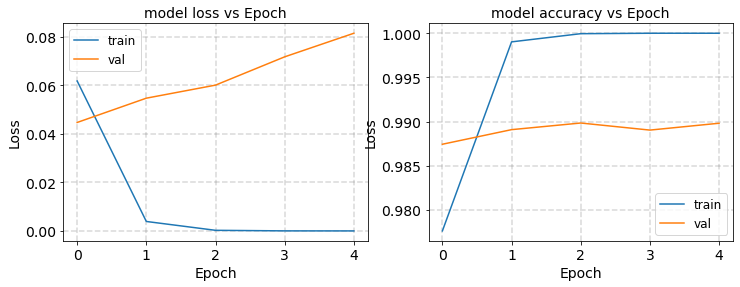

7
Epoch 1/5
1250/1250 - 3s - loss: 0.0618 - accuracy: 0.9882 - val_loss: 0.0429 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 3s - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0450 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 3s - loss: 5.2602e-04 - accuracy: 0.9999 - val_loss: 0.0529 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 3s - loss: 4.7985e-05 - accuracy: 1.0000 - val_loss: 0.0575 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 4s - loss: 1.5876e-05 - accuracy: 1.0000 - val_loss: 0.0620 - val_accuracy: 0.9914


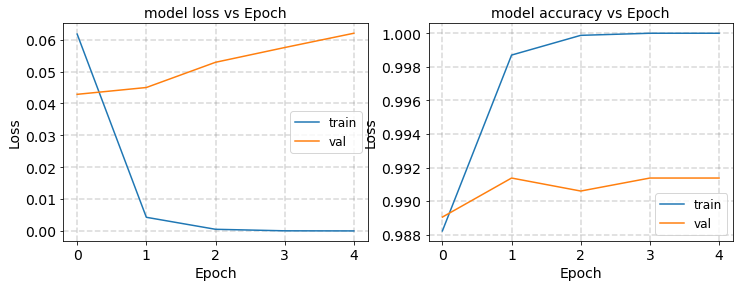

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0720 - accuracy: 0.9890 - val_loss: 0.0320 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 4s - loss: 5.4135e-04 - accuracy: 0.9999 - val_loss: 0.0368 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 4s - loss: 4.5028e-05 - accuracy: 1.0000 - val_loss: 0.0418 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 3s - loss: 1.4772e-05 - accuracy: 1.0000 - val_loss: 0.0462 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 3s - loss: 5.5490e-06 - accuracy: 1.0000 - val_loss: 0.0509 - val_accuracy: 0.9937


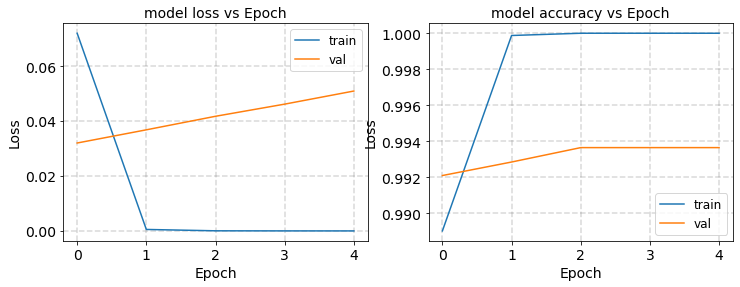

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0863 - accuracy: 0.9831 - val_loss: 0.0250 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 4s - loss: 0.0031 - accuracy: 0.9996 - val_loss: 0.0228 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 3.1559e-04 - accuracy: 0.9999 - val_loss: 0.0291 - val_accuracy: 0.9938
Epoch 4/5
1250/1250 - 3s - loss: 4.7834e-05 - accuracy: 1.0000 - val_loss: 0.0324 - val_accuracy: 0.9938
Epoch 5/5
1250/1250 - 4s - loss: 1.6269e-05 - accuracy: 1.0000 - val_loss: 0.0353 - val_accuracy: 0.9938


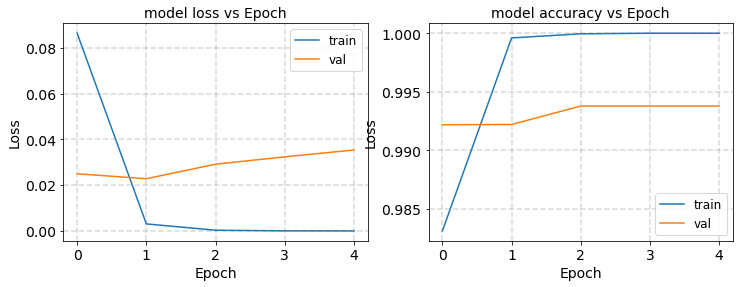

round1 [2 7 4 6]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.0753 - accuracy: 0.9859 - val_loss: 0.0448 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 4s - loss: 7.4752e-04 - accuracy: 0.9999 - val_loss: 0.0652 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 4s - loss: 5.8997e-05 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9867
Epoch 4/5
1250/1250 - 4s - loss: 1.7548e-05 - accuracy: 1.0000 - val_loss: 0.0874 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 4s - loss: 5.9327e-06 - accuracy: 1.0000 - val_loss: 0.0969 - val_accuracy: 0.9867


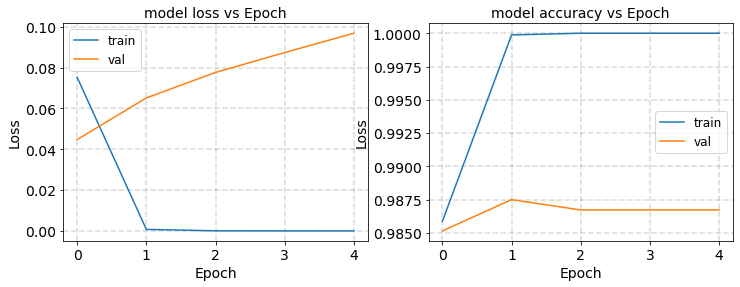

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0662 - accuracy: 0.9906 - val_loss: 0.0291 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0369 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 4s - loss: 9.6626e-05 - accuracy: 1.0000 - val_loss: 0.0413 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 4s - loss: 2.9841e-05 - accuracy: 1.0000 - val_loss: 0.0440 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 4s - loss: 1.2044e-05 - accuracy: 1.0000 - val_loss: 0.0459 - val_accuracy: 0.9914


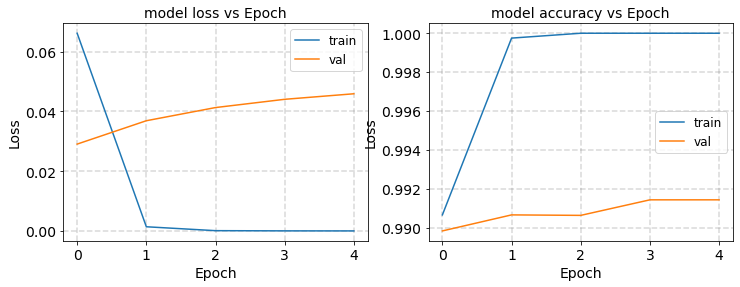

4
Epoch 1/5
1250/1250 - 5s - loss: 0.0852 - accuracy: 0.9849 - val_loss: 0.0364 - val_accuracy: 0.9906
Epoch 2/5
1250/1250 - 4s - loss: 0.0027 - accuracy: 0.9998 - val_loss: 0.0467 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 4s - loss: 5.1816e-04 - accuracy: 0.9999 - val_loss: 0.0524 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 5s - loss: 8.1176e-05 - accuracy: 1.0000 - val_loss: 0.0599 - val_accuracy: 0.9899
Epoch 5/5
1250/1250 - 4s - loss: 2.7930e-05 - accuracy: 1.0000 - val_loss: 0.0650 - val_accuracy: 0.9899


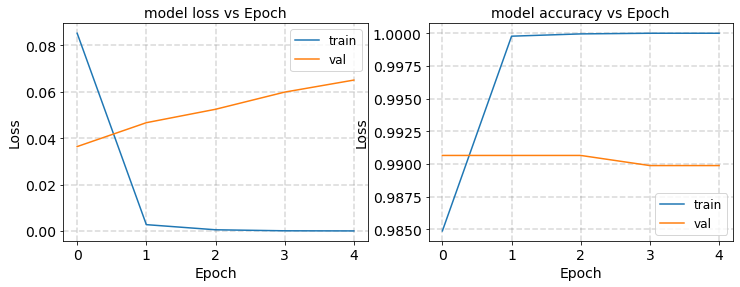

6
Epoch 1/5
1250/1250 - 5s - loss: 0.0645 - accuracy: 0.9918 - val_loss: 0.0395 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 5s - loss: 3.3644e-04 - accuracy: 1.0000 - val_loss: 0.0502 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 5s - loss: 6.8633e-05 - accuracy: 1.0000 - val_loss: 0.0575 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 5s - loss: 2.3215e-05 - accuracy: 1.0000 - val_loss: 0.0638 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 5s - loss: 8.9288e-06 - accuracy: 1.0000 - val_loss: 0.0695 - val_accuracy: 0.9913


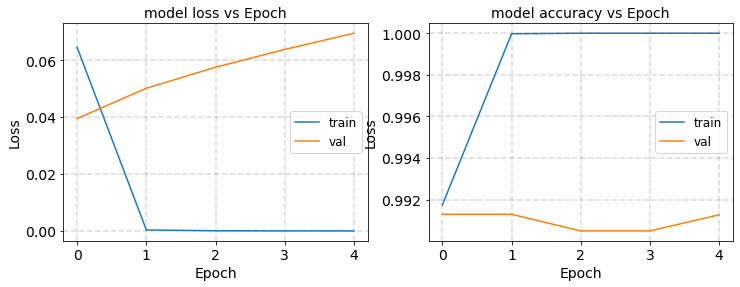

round2 [2 4 7 6]
2
Epoch 1/5
1250/1250 - 5s - loss: 0.0951 - accuracy: 0.9851 - val_loss: 0.0493 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 5s - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0575 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 1.3576e-04 - accuracy: 1.0000 - val_loss: 0.0629 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 4.5051e-05 - accuracy: 1.0000 - val_loss: 0.0698 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 5s - loss: 1.6229e-05 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9890


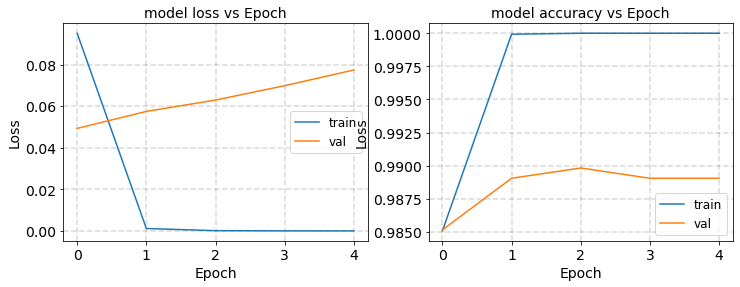

4
Epoch 1/5
1250/1250 - 5s - loss: 0.0868 - accuracy: 0.9826 - val_loss: 0.0450 - val_accuracy: 0.9922
Epoch 2/5
1250/1250 - 5s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0585 - val_accuracy: 0.9891
Epoch 3/5
1250/1250 - 4s - loss: 1.4790e-04 - accuracy: 1.0000 - val_loss: 0.0674 - val_accuracy: 0.9891
Epoch 4/5
1250/1250 - 5s - loss: 3.9028e-05 - accuracy: 1.0000 - val_loss: 0.0752 - val_accuracy: 0.9891
Epoch 5/5
1250/1250 - 4s - loss: 1.4044e-05 - accuracy: 1.0000 - val_loss: 0.0822 - val_accuracy: 0.9898


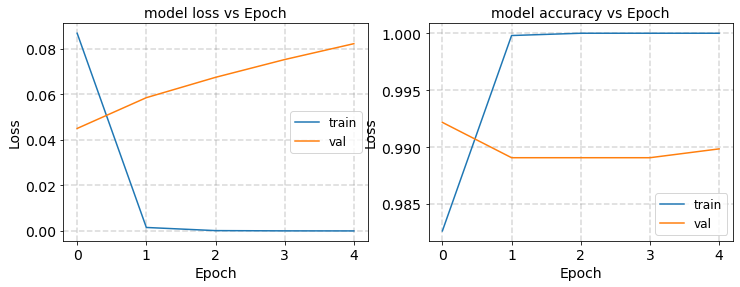

7
Epoch 1/5
1250/1250 - 5s - loss: 0.0965 - accuracy: 0.9879 - val_loss: 0.0401 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 5s - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0499 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 5s - loss: 1.0406e-04 - accuracy: 1.0000 - val_loss: 0.0567 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 5s - loss: 2.0988e-05 - accuracy: 1.0000 - val_loss: 0.0619 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 5s - loss: 6.7172e-06 - accuracy: 1.0000 - val_loss: 0.0684 - val_accuracy: 0.9898


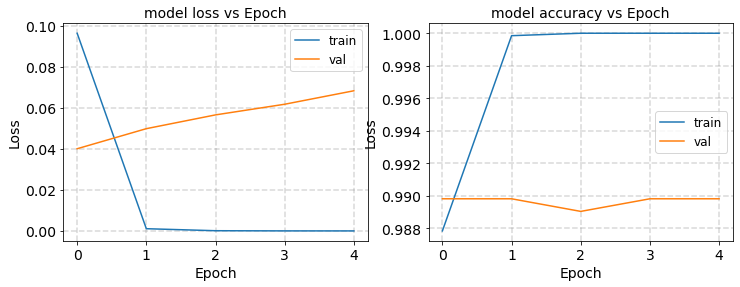

6
Epoch 1/5
1250/1250 - 5s - loss: 0.0916 - accuracy: 0.9932 - val_loss: 0.0219 - val_accuracy: 0.9928
Epoch 2/5
1250/1250 - 5s - loss: 4.9841e-04 - accuracy: 1.0000 - val_loss: 0.0249 - val_accuracy: 0.9928
Epoch 3/5
1250/1250 - 5s - loss: 1.2857e-04 - accuracy: 1.0000 - val_loss: 0.0279 - val_accuracy: 0.9920
Epoch 4/5
1250/1250 - 4s - loss: 4.7080e-05 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 0.9920
Epoch 5/5
1250/1250 - 5s - loss: 1.8883e-05 - accuracy: 1.0000 - val_loss: 0.0337 - val_accuracy: 0.9928


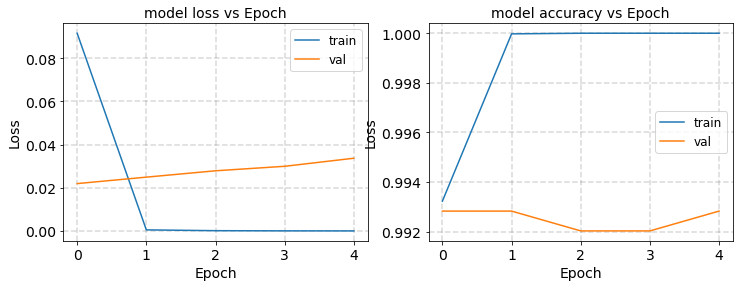

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_42 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_43 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_44 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_45 (None, 128)               32898     
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
_________________________________________

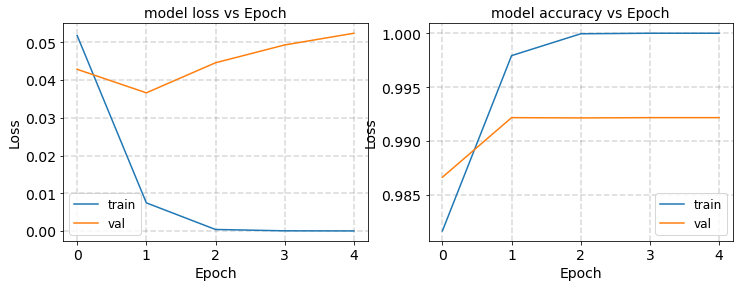

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0861 - accuracy: 0.9832 - val_loss: 0.0384 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0554 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 6.7574e-04 - accuracy: 0.9999 - val_loss: 0.0601 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 4s - loss: 7.3758e-05 - accuracy: 1.0000 - val_loss: 0.0672 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 1.9926e-05 - accuracy: 1.0000 - val_loss: 0.0744 - val_accuracy: 0.9898


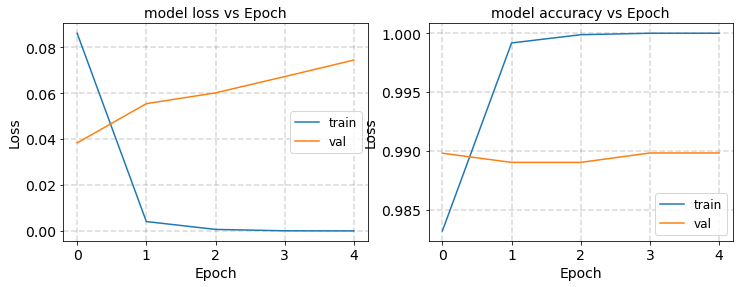

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0591 - accuracy: 0.9887 - val_loss: 0.0348 - val_accuracy: 0.9921
Epoch 2/5
1250/1250 - 4s - loss: 5.4162e-04 - accuracy: 0.9999 - val_loss: 0.0325 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 4s - loss: 5.6007e-05 - accuracy: 1.0000 - val_loss: 0.0386 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 1.0684e-05 - accuracy: 1.0000 - val_loss: 0.0445 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 4.1730e-06 - accuracy: 1.0000 - val_loss: 0.0470 - val_accuracy: 0.9929


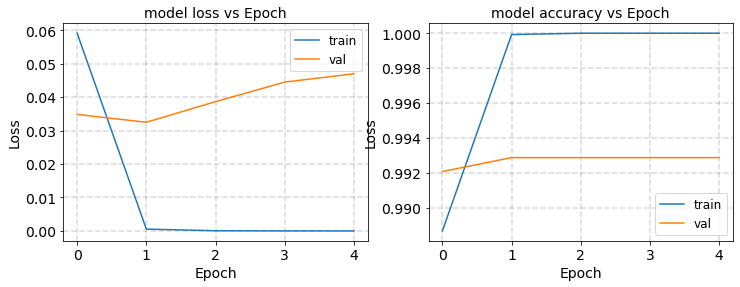

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0738 - accuracy: 0.9863 - val_loss: 0.0244 - val_accuracy: 0.9930
Epoch 2/5
1250/1250 - 4s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0305 - val_accuracy: 0.9945
Epoch 3/5
1250/1250 - 4s - loss: 1.4582e-04 - accuracy: 1.0000 - val_loss: 0.0385 - val_accuracy: 0.9953
Epoch 4/5
1250/1250 - 4s - loss: 2.7077e-05 - accuracy: 1.0000 - val_loss: 0.0444 - val_accuracy: 0.9953
Epoch 5/5
1250/1250 - 4s - loss: 7.8458e-06 - accuracy: 1.0000 - val_loss: 0.0499 - val_accuracy: 0.9953


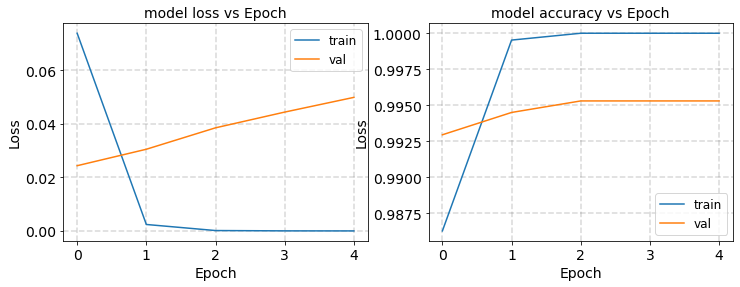

round1 [2 7 6 4]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.0856 - accuracy: 0.9864 - val_loss: 0.0518 - val_accuracy: 0.9859
Epoch 2/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0621 - val_accuracy: 0.9883
Epoch 3/5
1250/1250 - 4s - loss: 1.2341e-04 - accuracy: 1.0000 - val_loss: 0.0730 - val_accuracy: 0.9859
Epoch 4/5
1250/1250 - 5s - loss: 3.6963e-05 - accuracy: 1.0000 - val_loss: 0.0844 - val_accuracy: 0.9875
Epoch 5/5
1250/1250 - 4s - loss: 1.2736e-05 - accuracy: 1.0000 - val_loss: 0.0937 - val_accuracy: 0.9875


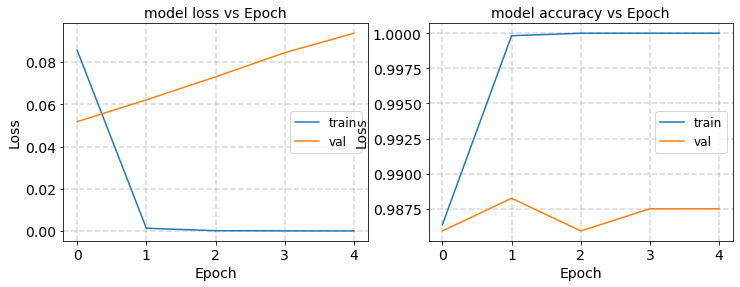

7
Epoch 1/5
1250/1250 - 5s - loss: 0.0844 - accuracy: 0.9868 - val_loss: 0.0338 - val_accuracy: 0.9891
Epoch 2/5
1250/1250 - 5s - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0396 - val_accuracy: 0.9930
Epoch 3/5
1250/1250 - 5s - loss: 2.3215e-04 - accuracy: 1.0000 - val_loss: 0.0444 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 5s - loss: 5.2020e-05 - accuracy: 1.0000 - val_loss: 0.0501 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 5s - loss: 1.9076e-05 - accuracy: 1.0000 - val_loss: 0.0550 - val_accuracy: 0.9922


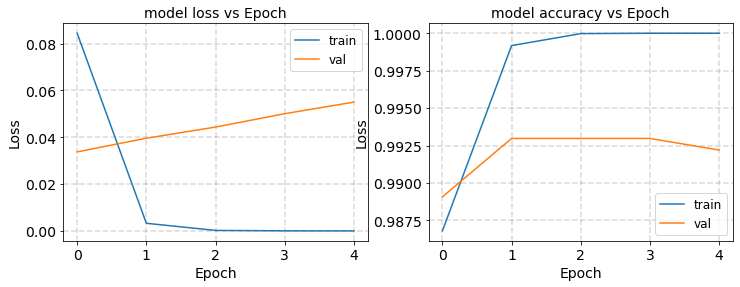

6
Epoch 1/5
1250/1250 - 5s - loss: 0.0988 - accuracy: 0.9862 - val_loss: 0.0275 - val_accuracy: 0.9929
Epoch 2/5
1250/1250 - 5s - loss: 8.0229e-04 - accuracy: 0.9999 - val_loss: 0.0329 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 5s - loss: 1.3508e-04 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 5s - loss: 4.3846e-05 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 5s - loss: 1.5725e-05 - accuracy: 1.0000 - val_loss: 0.0432 - val_accuracy: 0.9937


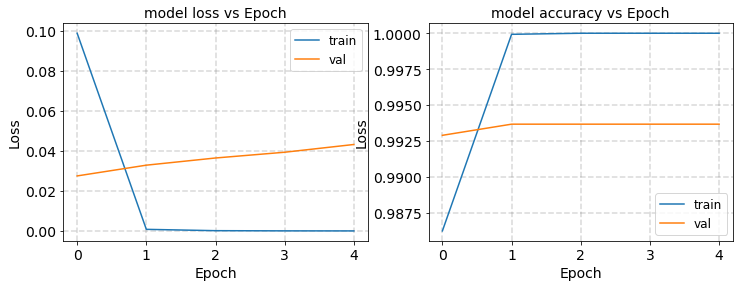

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0802 - accuracy: 0.9845 - val_loss: 0.0254 - val_accuracy: 0.9945
Epoch 2/5
1250/1250 - 4s - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0309 - val_accuracy: 0.9937
Epoch 3/5
1250/1250 - 4s - loss: 4.2542e-04 - accuracy: 0.9999 - val_loss: 0.0367 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 6.3114e-05 - accuracy: 1.0000 - val_loss: 0.0432 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 2.0758e-05 - accuracy: 1.0000 - val_loss: 0.0477 - val_accuracy: 0.9929


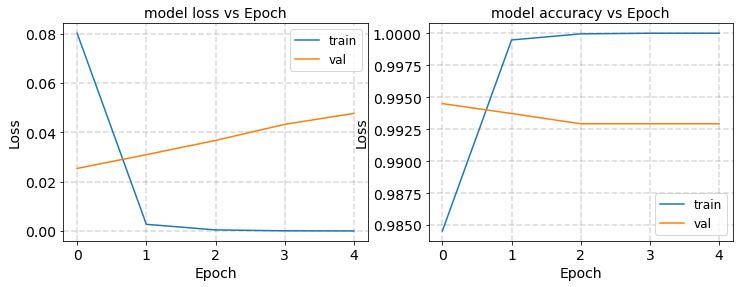

round2 [6 4 2 7]
6
Epoch 1/5
1250/1250 - 4s - loss: 0.0626 - accuracy: 0.9911 - val_loss: 0.0284 - val_accuracy: 0.9920
Epoch 2/5
1250/1250 - 4s - loss: 4.7283e-04 - accuracy: 1.0000 - val_loss: 0.0344 - val_accuracy: 0.9936
Epoch 3/5
1250/1250 - 4s - loss: 8.2256e-05 - accuracy: 1.0000 - val_loss: 0.0377 - val_accuracy: 0.9944
Epoch 4/5
1250/1250 - 4s - loss: 2.3371e-05 - accuracy: 1.0000 - val_loss: 0.0410 - val_accuracy: 0.9936
Epoch 5/5
1250/1250 - 4s - loss: 8.3922e-06 - accuracy: 1.0000 - val_loss: 0.0444 - val_accuracy: 0.9936


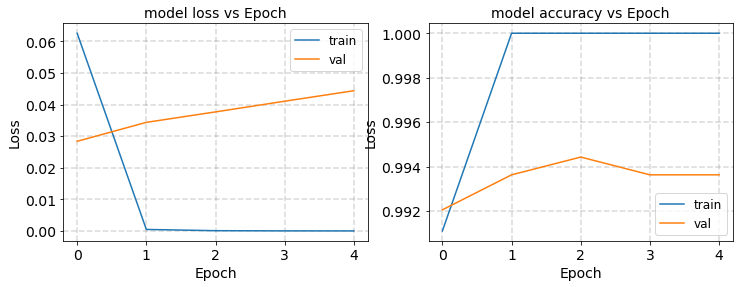

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0798 - accuracy: 0.9891 - val_loss: 0.0339 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 4s - loss: 3.6332e-04 - accuracy: 1.0000 - val_loss: 0.0453 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 4s - loss: 5.7672e-05 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 4s - loss: 1.8786e-05 - accuracy: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 4s - loss: 6.8562e-06 - accuracy: 1.0000 - val_loss: 0.0611 - val_accuracy: 0.9914


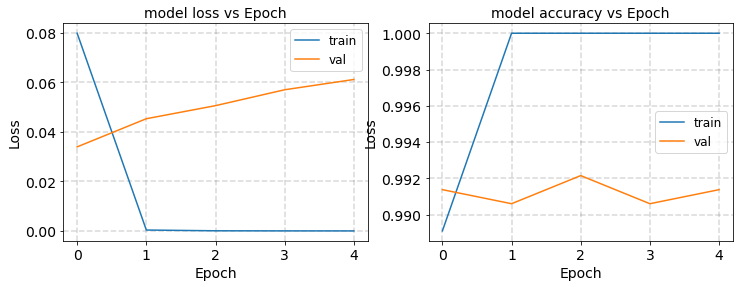

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1248 - accuracy: 0.9814 - val_loss: 0.0521 - val_accuracy: 0.9859
Epoch 2/5
1250/1250 - 4s - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0659 - val_accuracy: 0.9851
Epoch 3/5
1250/1250 - 4s - loss: 4.3201e-04 - accuracy: 1.0000 - val_loss: 0.0774 - val_accuracy: 0.9851
Epoch 4/5
1250/1250 - 4s - loss: 1.0825e-04 - accuracy: 1.0000 - val_loss: 0.0853 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 3s - loss: 3.6316e-05 - accuracy: 1.0000 - val_loss: 0.0946 - val_accuracy: 0.9859


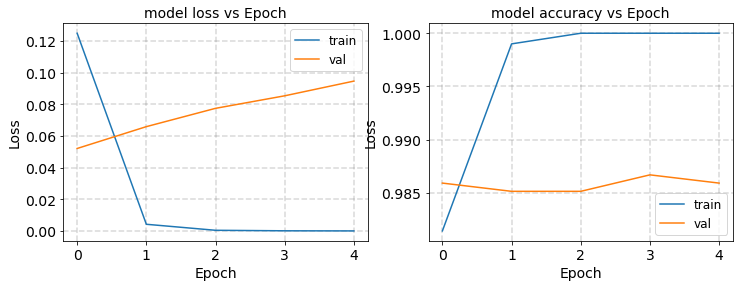

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0859 - accuracy: 0.9884 - val_loss: 0.0367 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 4s - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0314 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 4s - loss: 4.4625e-04 - accuracy: 1.0000 - val_loss: 0.0361 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 1.0930e-04 - accuracy: 1.0000 - val_loss: 0.0389 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 3.7693e-05 - accuracy: 1.0000 - val_loss: 0.0421 - val_accuracy: 0.9929


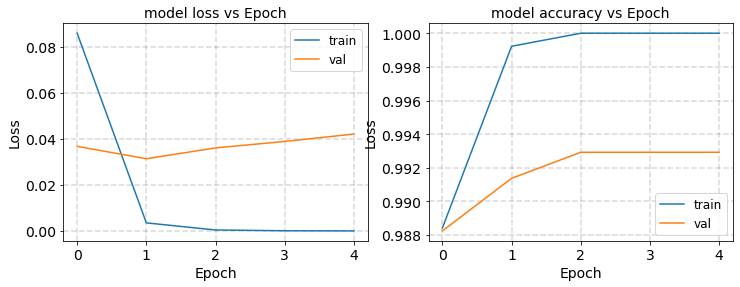

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_48 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_49 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_50 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_51 (None, 128)               32898     
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
_________________________________________

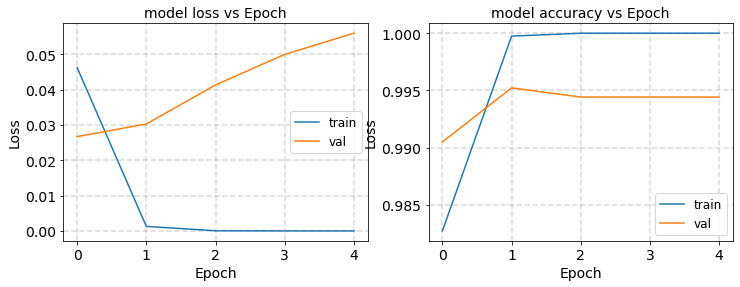

4
Epoch 1/5
1250/1250 - 5s - loss: 0.0774 - accuracy: 0.9829 - val_loss: 0.0329 - val_accuracy: 0.9883
Epoch 2/5
1250/1250 - 4s - loss: 0.0051 - accuracy: 0.9989 - val_loss: 0.0354 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 4s - loss: 7.1296e-04 - accuracy: 0.9999 - val_loss: 0.0473 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 4s - loss: 6.5129e-05 - accuracy: 1.0000 - val_loss: 0.0538 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 4s - loss: 2.2877e-05 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 0.9898


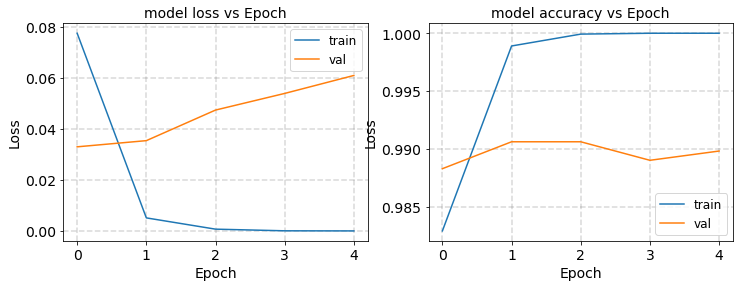

7
Epoch 1/5
1250/1250 - 4s - loss: 0.0533 - accuracy: 0.9905 - val_loss: 0.0250 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 4s - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0248 - val_accuracy: 0.9914
Epoch 3/5
1250/1250 - 4s - loss: 3.8933e-04 - accuracy: 0.9999 - val_loss: 0.0288 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 4s - loss: 3.9351e-05 - accuracy: 1.0000 - val_loss: 0.0359 - val_accuracy: 0.9930
Epoch 5/5
1250/1250 - 4s - loss: 9.4281e-06 - accuracy: 1.0000 - val_loss: 0.0423 - val_accuracy: 0.9930


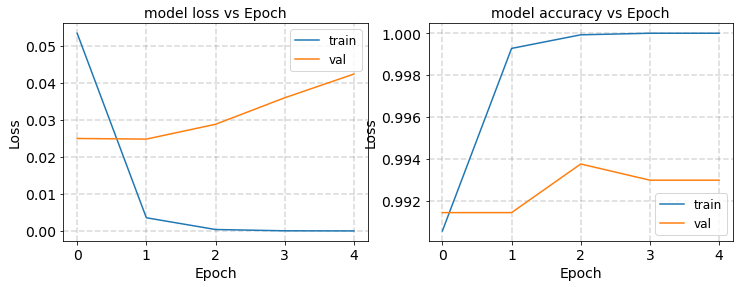

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1006 - accuracy: 0.9851 - val_loss: 0.0498 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 4s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0605 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 4s - loss: 3.7487e-04 - accuracy: 0.9998 - val_loss: 0.0710 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 4s - loss: 4.7115e-05 - accuracy: 1.0000 - val_loss: 0.0756 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 4s - loss: 1.3568e-05 - accuracy: 1.0000 - val_loss: 0.0810 - val_accuracy: 0.9914


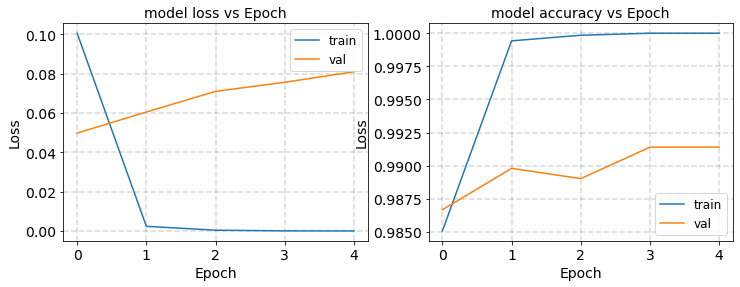

round1 [4 6 7 2]
4
Epoch 1/5
1250/1250 - 4s - loss: 0.0921 - accuracy: 0.9848 - val_loss: 0.0375 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0486 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 4s - loss: 1.2399e-04 - accuracy: 1.0000 - val_loss: 0.0540 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 4s - loss: 3.9297e-05 - accuracy: 1.0000 - val_loss: 0.0586 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 4s - loss: 1.5016e-05 - accuracy: 1.0000 - val_loss: 0.0627 - val_accuracy: 0.9906


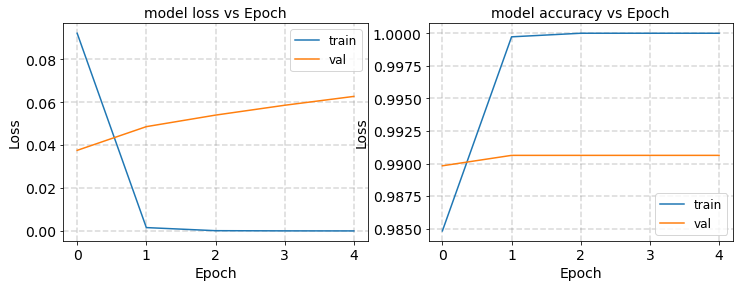

6
Epoch 1/5
1250/1250 - 5s - loss: 0.0566 - accuracy: 0.9924 - val_loss: 0.0383 - val_accuracy: 0.9912
Epoch 2/5
1250/1250 - 4s - loss: 2.2404e-04 - accuracy: 1.0000 - val_loss: 0.0523 - val_accuracy: 0.9912
Epoch 3/5
1250/1250 - 5s - loss: 3.5927e-05 - accuracy: 1.0000 - val_loss: 0.0589 - val_accuracy: 0.9920
Epoch 4/5
1250/1250 - 5s - loss: 1.2790e-05 - accuracy: 1.0000 - val_loss: 0.0652 - val_accuracy: 0.9920
Epoch 5/5
1250/1250 - 5s - loss: 5.0874e-06 - accuracy: 1.0000 - val_loss: 0.0697 - val_accuracy: 0.9928


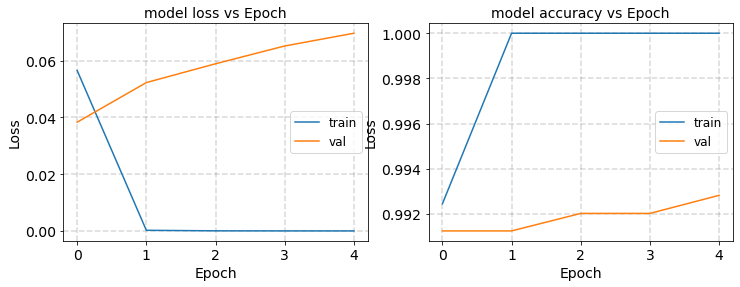

7
Epoch 1/5
1250/1250 - 5s - loss: 0.1065 - accuracy: 0.9864 - val_loss: 0.0317 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0287 - val_accuracy: 0.9938
Epoch 3/5
1250/1250 - 5s - loss: 2.0741e-04 - accuracy: 1.0000 - val_loss: 0.0326 - val_accuracy: 0.9930
Epoch 4/5
1250/1250 - 4s - loss: 3.9538e-05 - accuracy: 1.0000 - val_loss: 0.0367 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 1.5018e-05 - accuracy: 1.0000 - val_loss: 0.0391 - val_accuracy: 0.9922


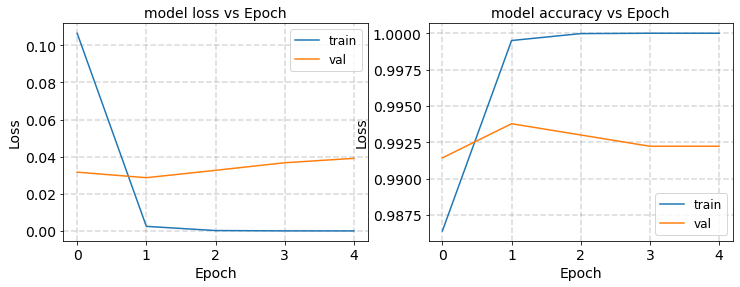

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0927 - accuracy: 0.9854 - val_loss: 0.0357 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0438 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 4s - loss: 2.1297e-04 - accuracy: 1.0000 - val_loss: 0.0500 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 4s - loss: 6.5221e-05 - accuracy: 1.0000 - val_loss: 0.0561 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 4s - loss: 2.3766e-05 - accuracy: 1.0000 - val_loss: 0.0627 - val_accuracy: 0.9914


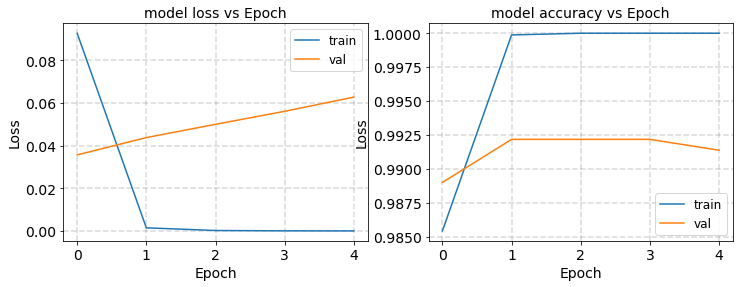

round2 [7 4 6 2]
7
Epoch 1/5
1250/1250 - 4s - loss: 0.0840 - accuracy: 0.9866 - val_loss: 0.0348 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0328 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 4s - loss: 2.3643e-04 - accuracy: 1.0000 - val_loss: 0.0385 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 4s - loss: 4.7344e-05 - accuracy: 1.0000 - val_loss: 0.0420 - val_accuracy: 0.9914
Epoch 5/5
1250/1250 - 4s - loss: 1.4585e-05 - accuracy: 1.0000 - val_loss: 0.0478 - val_accuracy: 0.9914


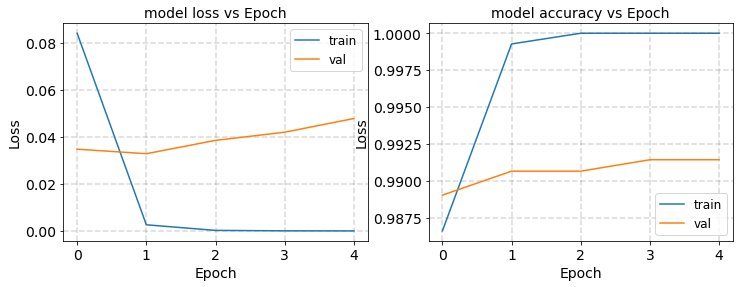

4
Epoch 1/5
1250/1250 - 4s - loss: 0.0919 - accuracy: 0.9877 - val_loss: 0.0465 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0600 - val_accuracy: 0.9906
Epoch 3/5
1250/1250 - 4s - loss: 1.1680e-04 - accuracy: 1.0000 - val_loss: 0.0687 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 4s - loss: 3.8957e-05 - accuracy: 1.0000 - val_loss: 0.0733 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 1.4232e-05 - accuracy: 1.0000 - val_loss: 0.0778 - val_accuracy: 0.9898


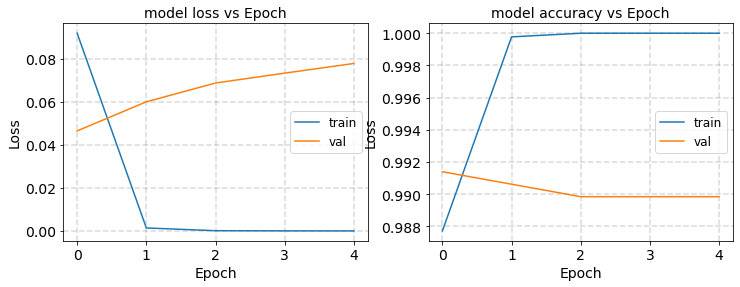

6
Epoch 1/5
1250/1250 - 4s - loss: 0.0632 - accuracy: 0.9933 - val_loss: 0.0314 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 4s - loss: 6.6576e-04 - accuracy: 0.9999 - val_loss: 0.0333 - val_accuracy: 0.9920
Epoch 3/5
1250/1250 - 4s - loss: 1.1709e-04 - accuracy: 1.0000 - val_loss: 0.0377 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 4s - loss: 3.6212e-05 - accuracy: 1.0000 - val_loss: 0.0410 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 4s - loss: 1.4153e-05 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9929


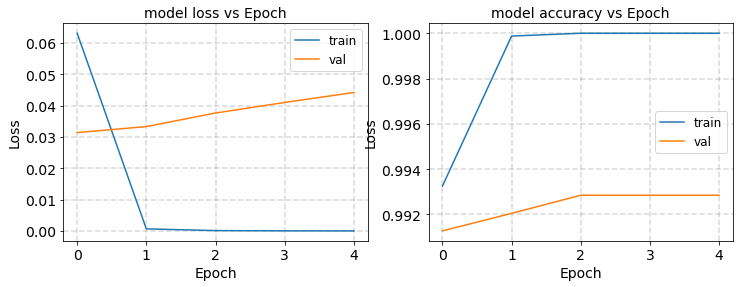

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0922 - accuracy: 0.9878 - val_loss: 0.0562 - val_accuracy: 0.9867
Epoch 2/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0675 - val_accuracy: 0.9867
Epoch 3/5
1250/1250 - 4s - loss: 1.9632e-04 - accuracy: 1.0000 - val_loss: 0.0761 - val_accuracy: 0.9875
Epoch 4/5
1250/1250 - 4s - loss: 6.2860e-05 - accuracy: 1.0000 - val_loss: 0.0833 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 4s - loss: 2.3613e-05 - accuracy: 1.0000 - val_loss: 0.0894 - val_accuracy: 0.9866


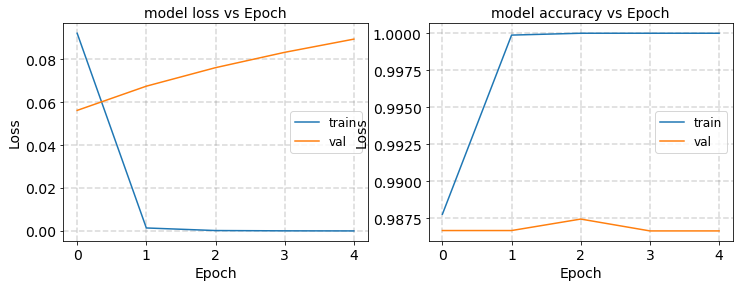

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_54 (None, 128)               200834    
_________________________________________________________________
prune_low_magnitude_dense_55 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_56 (None, 128)               32898     
_________________________________________________________________
prune_low_magnitude_dense_57 (None, 128)               32898     
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 516       
Total params: 300,045
Trainable params: 150,532
Non-trainable params: 149,513
_________________________________________

In [4]:
%%time
series = [2,4,6,7]
num_runs = 10
name = '2467_seq_prune_08_4_128_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=128,
                                  num_output_nodes=4,
                                  pruning=0.8,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2467_seq_prune_08_4_128_run0  1.80056         1.79667      0.0190197   
2467_seq_prune_08_4_128_run1   1.7759         1.77592      0.0164743   
2467_seq_prune_08_4_128_run2  1.87357         1.88706       0.013368   
2467_seq_prune_08_4_128_run3  1.78523         1.82445      0.0226944   
2467_seq_prune_08_4_128_run4  1.80413         1.81322      0.0230585   
2467_seq_prune_08_4_128_run5  1.74632         1.73421        0.02083   
2467_seq_prune_08_4_128_run6  1.77779         1.83965       0.029034   
2467_seq_prune_08_4_128_run7  1.78154         1.78071       0.023042   
2467_seq_prune_08_4_128_run8  1.82126         1.84348      0.0266589   
2467_seq_prune_08_4_128_run9  1.77025         1.76459      0.0242212   

                             Ste_n_cut_rand Percentile P_value Significance  \
2467_seq_prune_08_4_128_run0     0.00425294         65     0.7           No   
2467_seq_prune_08_4_128_run1     0.00368377         45     0.9           No   
2467_seq_prune_08_4_128_run2     0.00298918         15     0.3           No   
2467_seq_prune_08_4_128_run3     0.00507462          0       0          Yes   
2467_seq_prune_08_4_128_run4     0.00515605         30     0.6           No   
2467_seq_prune_08_4_128_run5     0.00465774         70     0.6           No   
2467_seq_prune_08_4_128_run6     0.00649219          5     0.1           No   
2467_seq_prune_08_4_128_run7     0.00515234         40     0.8           No   
2467_seq_prune_08_4_128_run8      0.0059611         20     0.4           No   
2467_seq_prune_08_4_128_run9     0.00541603         60     0.8           No   

                             Direction  Accuracy  
2467_seq_prune_08_4_128_run0    larger     0.978  
2467_seq_prune_08_4_128_run1   smaller  0.957575  
2467_seq_prune_08_4_128_run2   smaller   0.96705  
2467_seq_prune_08_4_128_run3   smaller  0.977275  
2467_seq_prune_08_4_128_run4   smaller    0.9765  
2467_seq_prune_08_4_128_run5    larger   0.96945  
2467_seq_prune_08_4_128_run6   smaller  0.966275  
2467_seq_prune_08_4_128_run7   smaller  0.968575  
2467_seq_prune_08_4_128_run8   smaller   0.97555  
2467_seq_prune_08_4_128_run9    larger    0.9702

#### Save dataframe

In [6]:
import pickle
path = './Exps/'
with open(path + 'df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open(path + 'df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2467_seq_prune_08_4_128_run0  1.80056         1.79667      0.0190197   
2467_seq_prune_08_4_128_run1   1.7759         1.77592      0.0164743   
2467_seq_prune_08_4_128_run2  1.87357         1.88706       0.013368   
2467_seq_prune_08_4_128_run3  1.78523         1.82445      0.0226944   
2467_seq_prune_08_4_128_run4  1.80413         1.81322      0.0230585   
2467_seq_prune_08_4_128_run5  1.74632         1.73421        0.02083   
2467_seq_prune_08_4_128_run6  1.77779         1.83965       0.029034   
2467_seq_prune_08_4_128_run7  1.78154         1.78071       0.023042   
2467_seq_prune_08_4_128_run8  1.82126         1.84348      0.0266589   
2467_seq_prune_08_4_128_run9  1.77025         1.76459      0.0242212   

                             Ste_n_cut_rand Percentile P_value Significance  \
2467_seq_prune_08_4_128_run0     0.00425294         65     0.7           No   
2467_seq_prune_08_4_128_run1     0.00368377         45     0.9           No   
2467_seq_prune_08_4_128_run2     0.00298918         15     0.3           No   
2467_seq_prune_08_4_128_run3     0.00507462          0       0          Yes   
2467_seq_prune_08_4_128_run4     0.00515605         30     0.6           No   
2467_seq_prune_08_4_128_run5     0.00465774         70     0.6           No   
2467_seq_prune_08_4_128_run6     0.00649219          5     0.1           No   
2467_seq_prune_08_4_128_run7     0.00515234         40     0.8           No   
2467_seq_prune_08_4_128_run8      0.0059611         20     0.4           No   
2467_seq_prune_08_4_128_run9     0.00541603         60     0.8           No   

                             Direction  Accuracy  
2467_seq_prune_08_4_128_run0    larger     0.978  
2467_seq_prune_08_4_128_run1   smaller  0.957575  
2467_seq_prune_08_4_128_run2   smaller   0.96705  
2467_seq_prune_08_4_128_run3   smaller  0.977275  
2467_seq_prune_08_4_128_run4   smaller    0.9765  
2467_seq_prune_08_4_128_run5    larger   0.96945  
2467_seq_prune_08_4_128_run6   smaller  0.966275  
2467_seq_prune_08_4_128_run7   smaller  0.968575  
2467_seq_prune_08_4_128_run8   smaller   0.97555  
2467_seq_prune_08_4_128_run9    larger    0.9702

In [7]:
df_models[0].layers[1].get_weights()[0]

array([[-0.        , -0.        ,  0.        , ..., -0.        ,
         0.        , -0.07530342],
       [-0.        , -0.07251354,  0.        , ...,  0.        ,
        -0.        ,  0.06505898],
       [ 0.06735548,  0.        , -0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        , -0.07817767, -0.07158309, ...,  0.        ,
         0.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        ,  0.        ],
       [-0.        ,  0.06964961,  0.07232127, ...,  0.        ,
        -0.        , -0.        ]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

1.8005590356331824
1.7966743068098818
0.019019746076962905
0.0042529445142874
65.0
0.7000000000000001
No
larger
0.9779999852180481
